In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
try:
    from utils.constants import *
    from utils.miniowrapper import MinIOWrapper
except ModuleNotFoundError:
    from notebooks.utils.constants import *
    from notebooks.utils.miniowrapper import MinIOWrapper

# Recuperando Datasets

In [2]:
client = MinIOWrapper()
bucket = "data-pipeline-crawler-dozers"

## Datasets Completos

In [3]:
df_1160_0296 = client.get_obj_minio(bucket, "full/df_1160h.csv")
df_1582_0509 = client.get_obj_minio(bucket, "full/df_1582h.csv")
df_1604_0699 = client.get_obj_minio(bucket, "full/df_1604h.csv")
df_1993_0264 = client.get_obj_minio(bucket, "full/df_1993h.csv")
df_2026_0381 = client.get_obj_minio(bucket, "full/df_2026h.csv")
df_2089_0451 = client.get_obj_minio(bucket, "full/df_2089h.csv")
df_2281_0440 = client.get_obj_minio(bucket, "full/df_2281h.csv")
df_2490_0424 = client.get_obj_minio(bucket, "full/df_2490h.csv")
df_2784_0200 = client.get_obj_minio(bucket, "full/df_2784h.csv")
df_3208_0379 = client.get_obj_minio(bucket, "full/df_3208h.csv")

df_full_list = {
      '1160': df_1160_0296,
      '1582': df_1582_0509,
      '1604': df_1604_0699,
      '1993': df_1993_0264,
      '2026': df_2026_0381,
      '2089': df_2089_0451,
      '2281': df_2281_0440,
      '2490': df_2490_0424,
      '2784': df_2784_0200,
      '3208': df_3208_0379,
}

df_1160_0296.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 32 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Temperatura Máxima do Óleo Hidráulico Temperatura                 572 non-null    float64
 1   Temp. Máx. do Óleo da Transm. Temperatura do Óleo da Transmissão  572 non-null    float64
 2   Ajuste da Rotação da Transmissão 0,5 a 0,9                        572 non-null    float64
 3   Ajuste da Rotação da Transmissão 1,0 a 1,4                        572 non-null    float64
 4   Ajuste da Rotação da Transmissão 2,5 a 2,9                        572 non-null    float64
 5   Ajuste da Rotação da Transmissão 3,0 a 3,5                        572 non-null    float64
 6   Ajuste da Rotação da Transmissão 1,5 a 1,9                        572 non-null    float64
 7   Ajuste da Rotação da Transmissão 2,

## Datasets Filtrados por Horímetro

In [ ]:
df_1160_0296_1100 = client.get_obj_minio(bucket,"filtered/df_1160h_1100.csv")
df_1582_0509_1100 = client.get_obj_minio(bucket,"filtered/df_1582h_1100.csv")
df_1604_0699_1100 = client.get_obj_minio(bucket,"filtered/df_1604h_1100.csv")
df_1993_0264_1100 = client.get_obj_minio(bucket,"filtered/df_1993h_1100.csv")
df_2026_0381_1100 = client.get_obj_minio(bucket,"filtered/df_2026h_1100.csv")
df_2089_0451_1100 = client.get_obj_minio(bucket,"filtered/df_2089h_1100.csv")
df_2281_0440_1100 = client.get_obj_minio(bucket,"filtered/df_2281h_1100.csv")
df_2490_0424_1100 = client.get_obj_minio(bucket,"filtered/df_2490h_1100.csv")
df_2784_0200_1100 = client.get_obj_minio(bucket,"filtered/df_2784h_1100.csv")
df_3208_0379_1100 = client.get_obj_minio(bucket,"filtered/df_3208h_1100.csv")

df_filtered_list = {
      '1160': df_1160_0296_1100,
      '1582': df_1582_0509_1100,
      '1604': df_1604_0699_1100,
      '1993': df_1993_0264_1100,
      '2026': df_2026_0381_1100,
      '2089': df_2089_0451_1100,
      '2281': df_2281_0440_1100,
      '2490': df_2490_0424_1100,
      '2784': df_2784_0200_1100,
      '3208': df_3208_0379_1100,
}


# Análise Isolada de um Trator de Esteiras

## Heatmap

### Heatmap Geral

<Axes: >

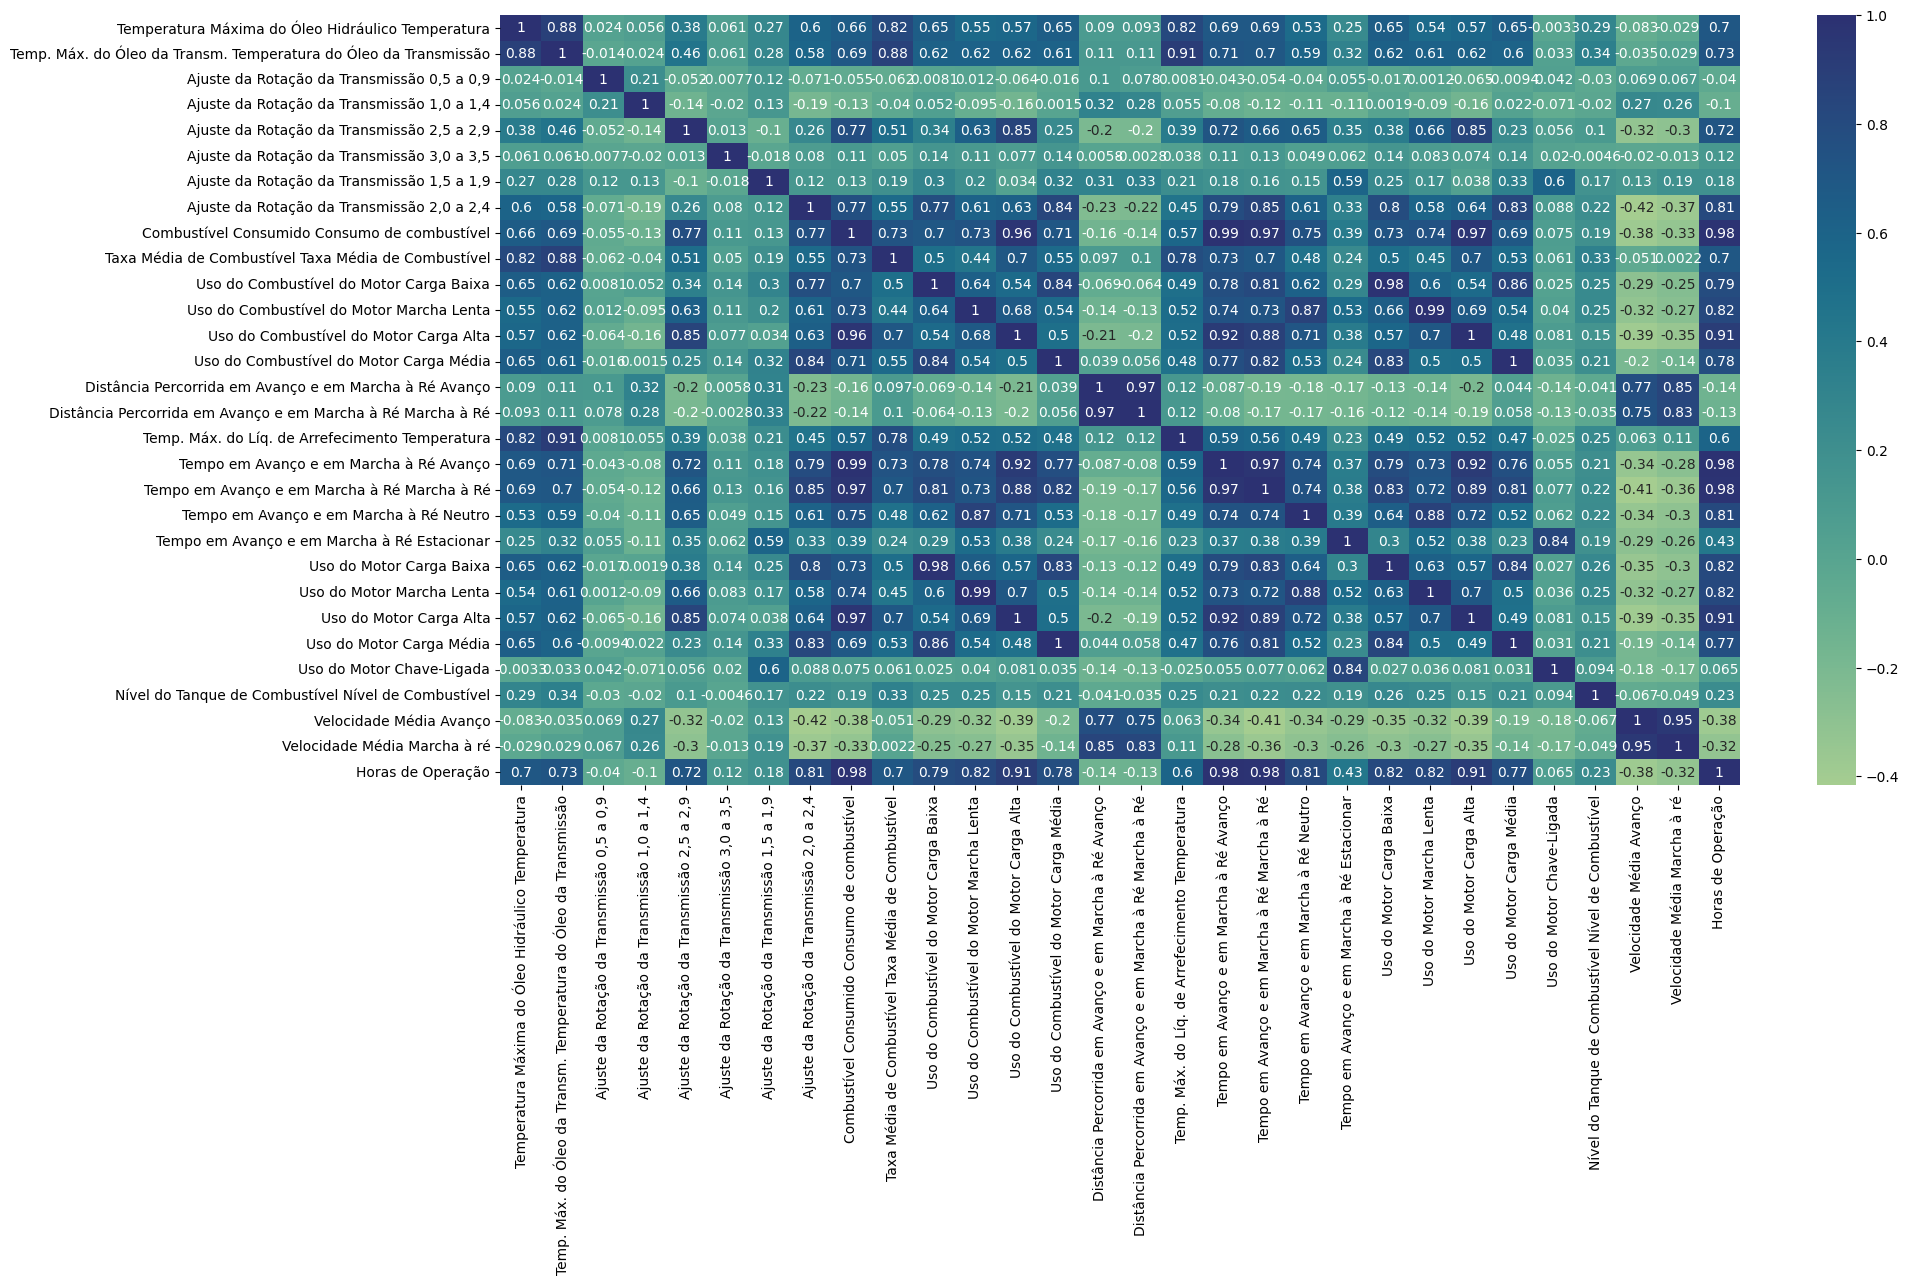

In [5]:
plt.figure(figsize=(20,10))

c = df_1160_0296.drop(columns=['Uso do Combustível do Motor Chave-Ligada']).corr(numeric_only=True)
sns.heatmap(c, cmap="crest", annot=True)

### Correlações encontradas

#### Temperaturas

<Axes: >

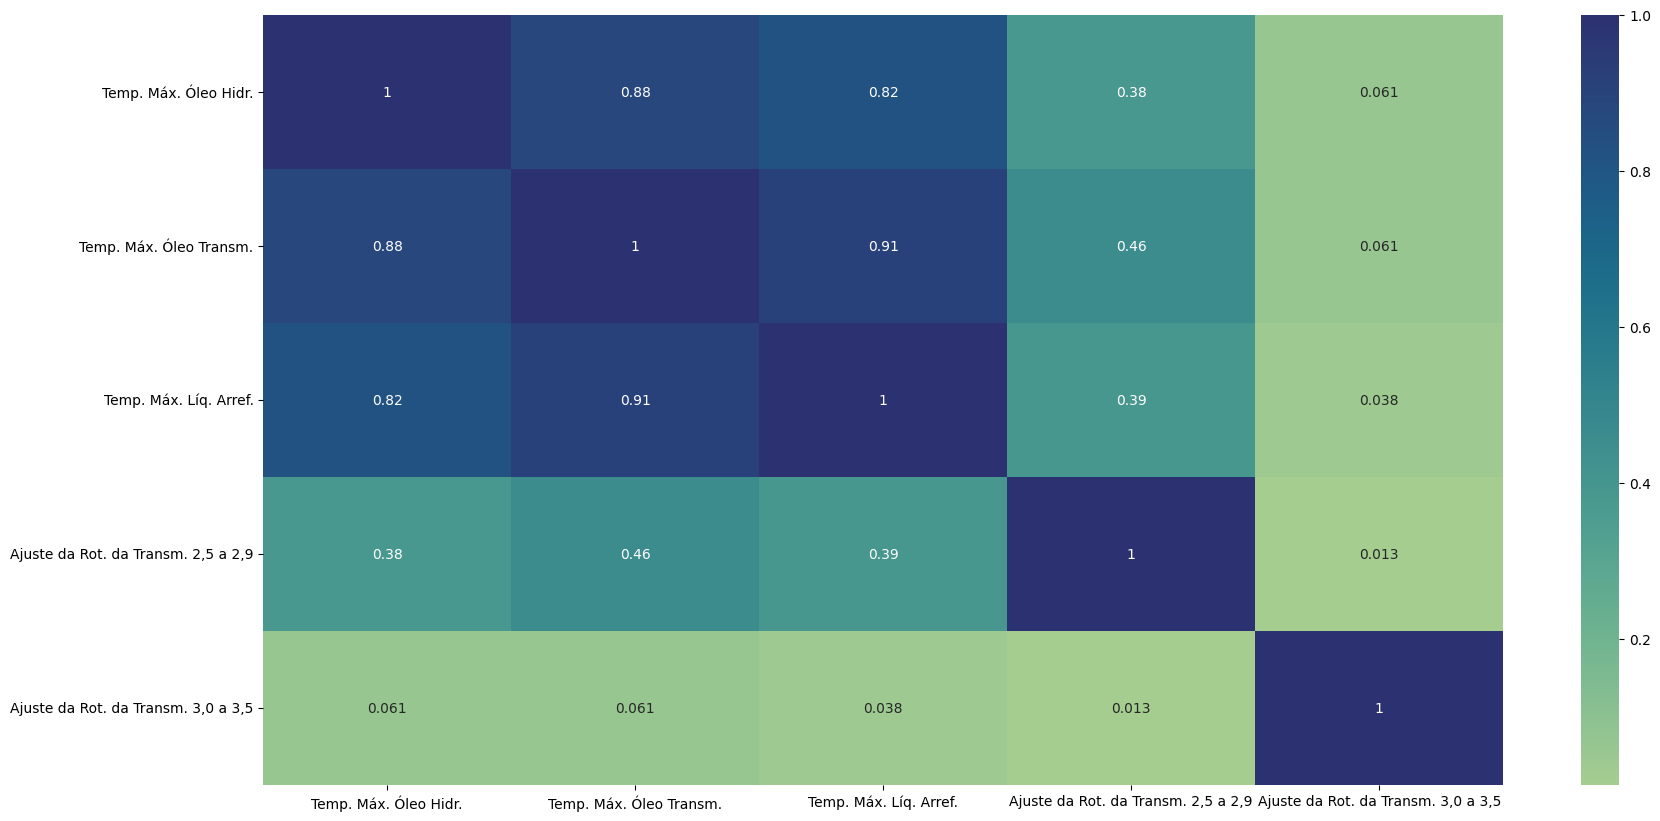

In [6]:
plt.figure(figsize=(20,10))

data_1 = df_1160_0296[['Temperatura Máxima do Óleo Hidráulico Temperatura',
         'Temp. Máx. do Óleo da Transm. Temperatura do Óleo da Transmissão',
         'Temp. Máx. do Líq. de Arrefecimento Temperatura',
          'Ajuste da Rotação da Transmissão 2,5 a 2,9',
         'Ajuste da Rotação da Transmissão 3,0 a 3,5',
         ]].rename(columns=new_columns).corr(numeric_only=True)
sns.heatmap(data_1, cmap="crest", annot=True)

#### Uso do motor e tempos em deslocamento

<Axes: >

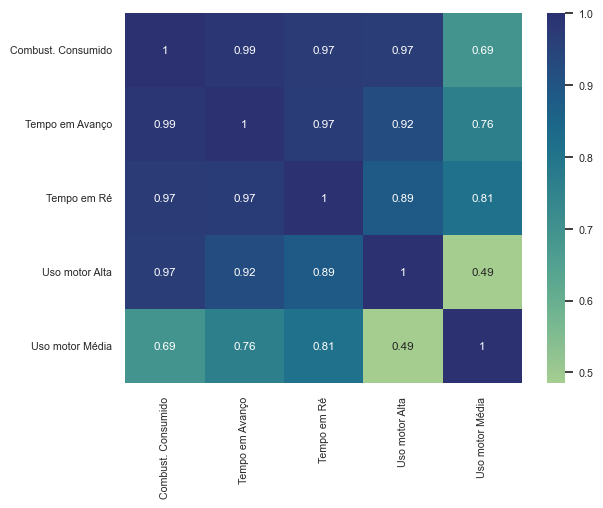

In [7]:
sns.set_theme(font_scale=0.7)
data_2 = df_1160_0296[['Combustível Consumido Consumo de combustível',
         'Tempo em Avanço e em Marcha à Ré Avanço',
         'Tempo em Avanço e em Marcha à Ré Marcha à Ré',
         'Uso do Motor Carga Alta',
         'Uso do Motor Carga Média'
         ]].rename(columns=new_columns).corr(numeric_only=True)
sns.heatmap(data_2, cmap="crest", annot=True)

# Análise de Múltiplos Tratores de Esteiras

In [ ]:
def double_line_plot(df1, df2, label1, label2, x, y, title, color2='cornflowerblue'):
  ax = df1.plot(x=x, y=y, label=label1, color='orange')
  df2.plot(ax=ax, x=x, y=y, label=label2, figsize=(16,5), title=title, color=color2)
  plt.show()

## Horas do Motor x Tempo em Reversão

### Trator de 1582h vs Trator de 2089h

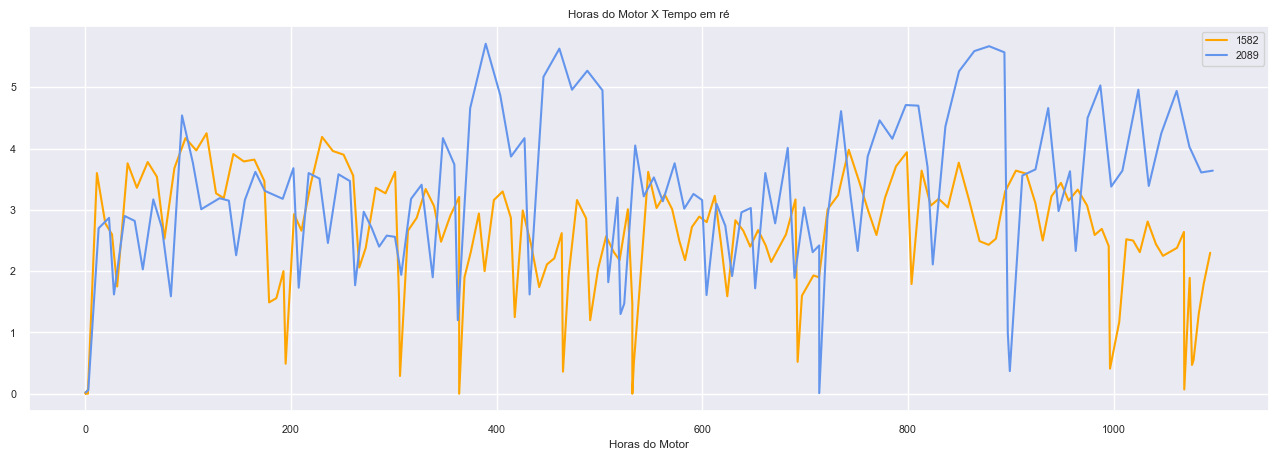

In [8]:
double_line_plot(df1=df_1582_0509_1100, df2=df_2089_0451_1100, label1='1582',
                 label2='2089', x='Horas do Motor',
                 y='Tempo em Avanço e em Marcha à Ré Marcha à Ré',
                 title='Horas do Motor X Tempo em ré')

### Trator de 1582h vs Trator de 1160h

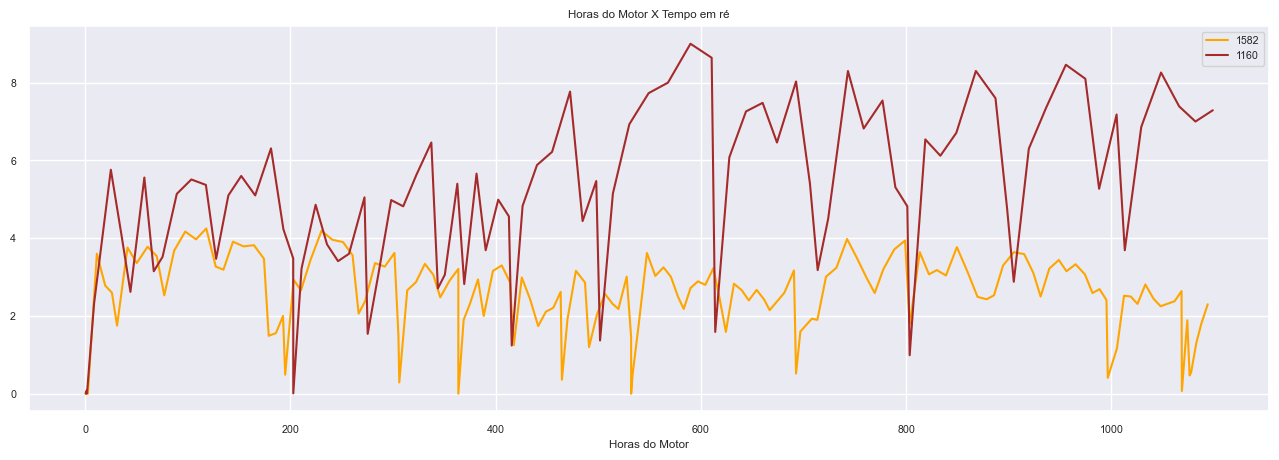

In [9]:
double_line_plot(df1=df_1582_0509_1100, df2=df_1160_0296_1100, label1='1582',
                 label2='1160', x='Horas do Motor',
                 y='Tempo em Avanço e em Marcha à Ré Marcha à Ré',
                 title='Horas do Motor X Tempo em ré', color2='brown')

## Horas do Motor x Ajuste da Rotação da Transmissão 2,0 a 2,4

### Trator de 1582h vs Trator de 2089h

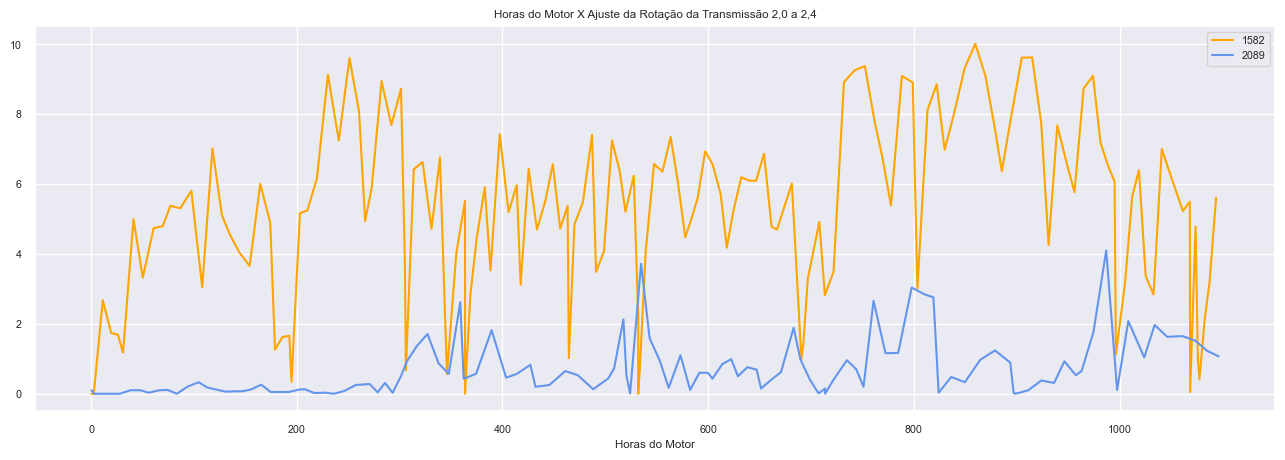

In [10]:
double_line_plot(df1=df_1582_0509_1100, df2=df_2089_0451_1100, label1='1582',
                 label2='2089', x='Horas do Motor',
                 y='Ajuste da Rotação da Transmissão 2,0 a 2,4',
                 title='Horas do Motor X Ajuste da Rotação da Transmissão 2,0 a 2,4')

### Trator de 1582h vs Trator de 1160h

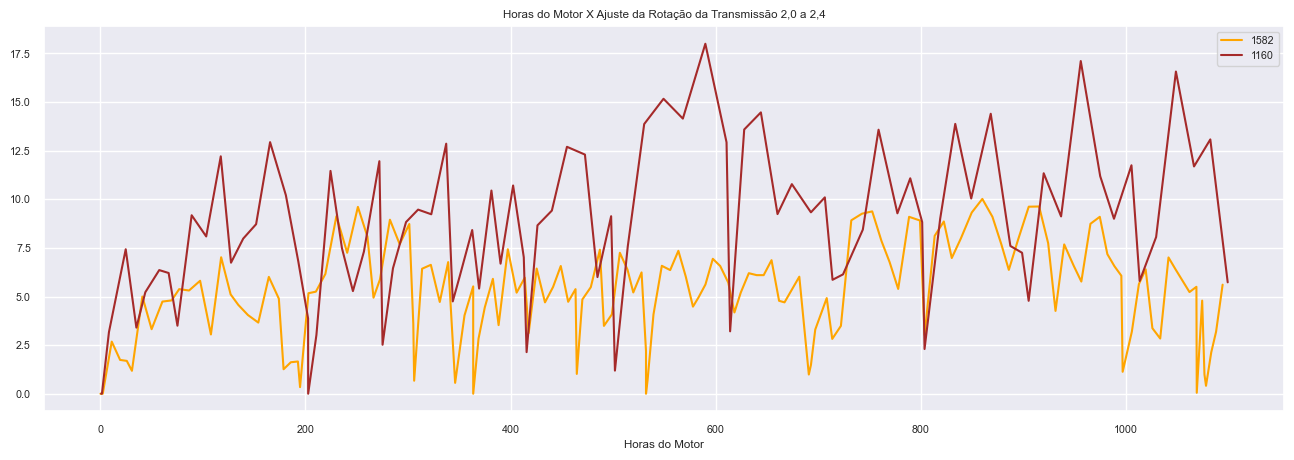

In [11]:
double_line_plot(df1=df_1582_0509_1100, df2=df_1160_0296_1100, label1='1582',
                 label2='1160', x='Horas do Motor',
                 y='Ajuste da Rotação da Transmissão 2,0 a 2,4',
                 title='Horas do Motor X Ajuste da Rotação da Transmissão 2,0 a 2,4', color2='brown')

## Tempo Total em Deslocamento e Uso do Motor até 1100 horas

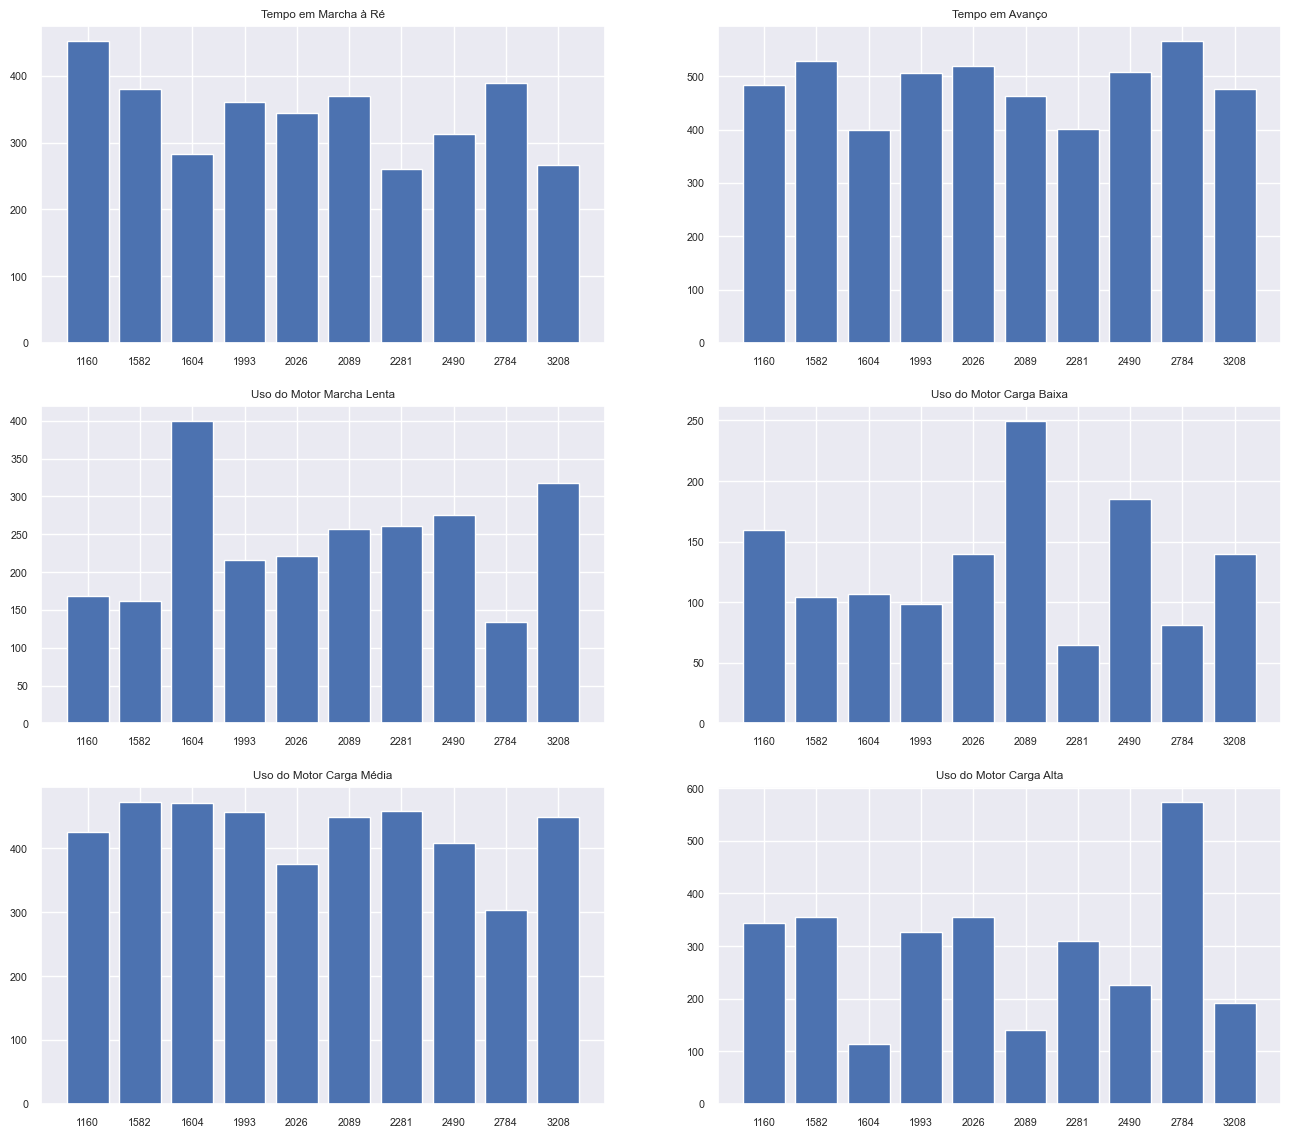

In [12]:
def get_data_to_bar_plot(col):
  xdata = [x for x in df_filtered_list.keys()]
  ydata = [y[col].sum() for y in df_filtered_list.values()]
  
  return xdata, ydata

forward_time_x, forward_time_y = get_data_to_bar_plot('Tempo em Avanço e em Marcha à Ré Avanço')
reverse_time_x, reverse_time_y = get_data_to_bar_plot('Tempo em Avanço e em Marcha à Ré Marcha à Ré')
idle_time_x, idle_time_y = get_data_to_bar_plot('Uso do Motor Marcha Lenta')
low_time_x, low_time_y = get_data_to_bar_plot('Uso do Motor Carga Baixa')
mid_time_x, mid_time_y = get_data_to_bar_plot('Uso do Motor Carga Média')
high_time_x, high_time_y = get_data_to_bar_plot('Uso do Motor Carga Alta')

fig, ax = plt.subplots(3, 2, figsize=(16, 14))

ax[0, 0].bar(reverse_time_x, reverse_time_y)
ax[0, 0].set_title('Tempo em Marcha à Ré')

ax[0, 1].bar(forward_time_x, forward_time_y)
ax[0, 1].set_title('Tempo em Avanço')

ax[1, 0].bar(idle_time_x, idle_time_y)
ax[1, 0].set_title('Uso do Motor Marcha Lenta')

ax[1, 1].bar(low_time_x, low_time_y)
ax[1, 1].set_title('Uso do Motor Carga Baixa')

ax[2, 0].bar(mid_time_x, mid_time_y)
ax[2, 0].set_title('Uso do Motor Carga Média')

ax[2, 1].bar(high_time_x, high_time_y)
ax[2, 1].set_title('Uso do Motor Carga Alta')

plt.show()

## Buscando padrões com o Pior Trator vs Trator Intermediário vs Melhor Trator

### Gráficos

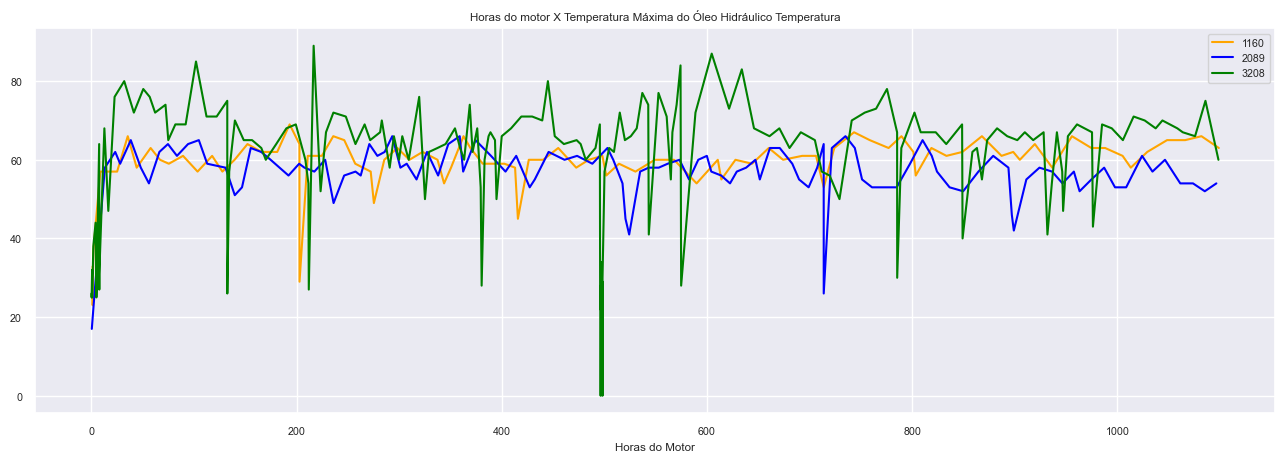

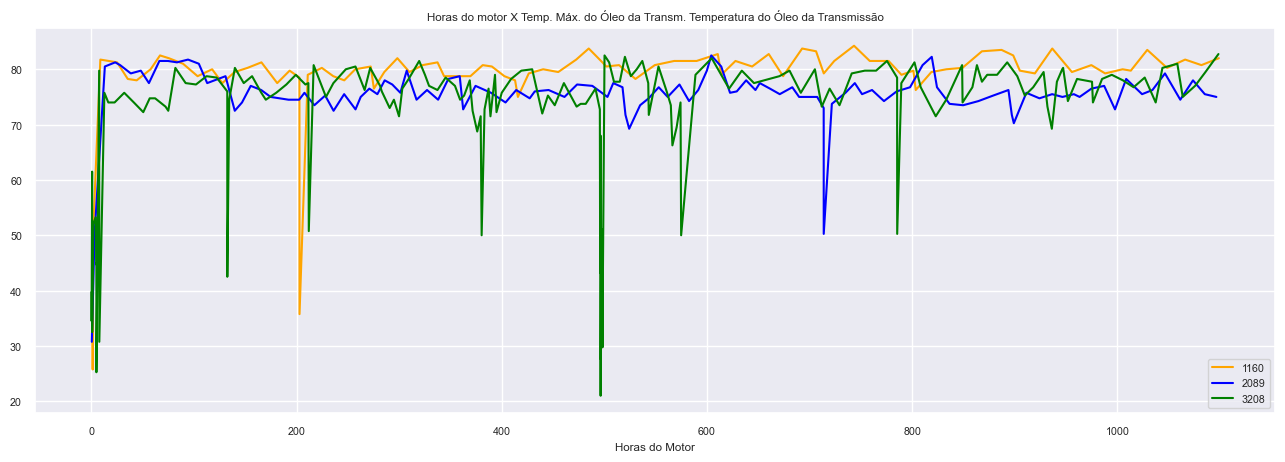

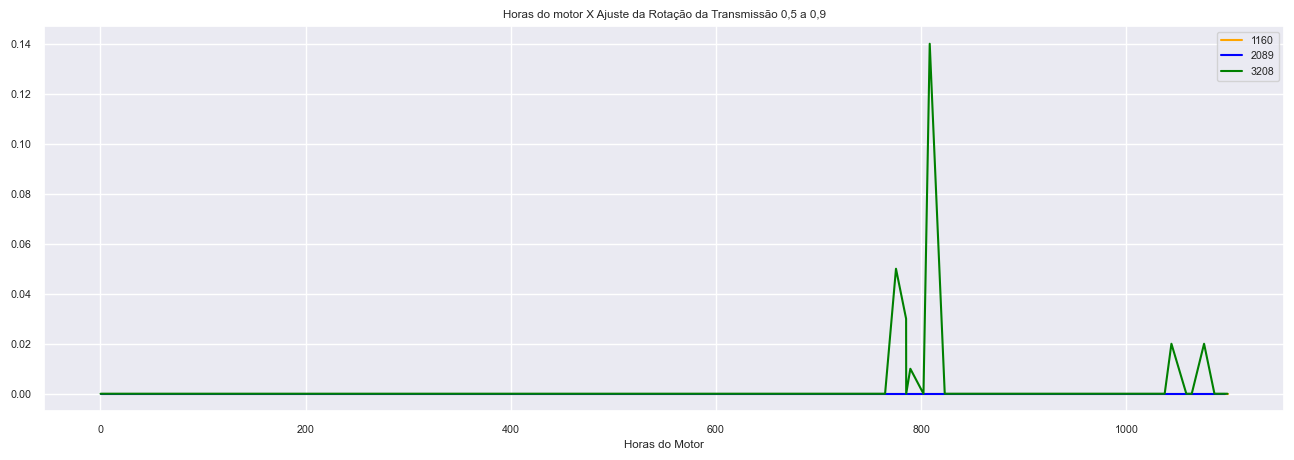

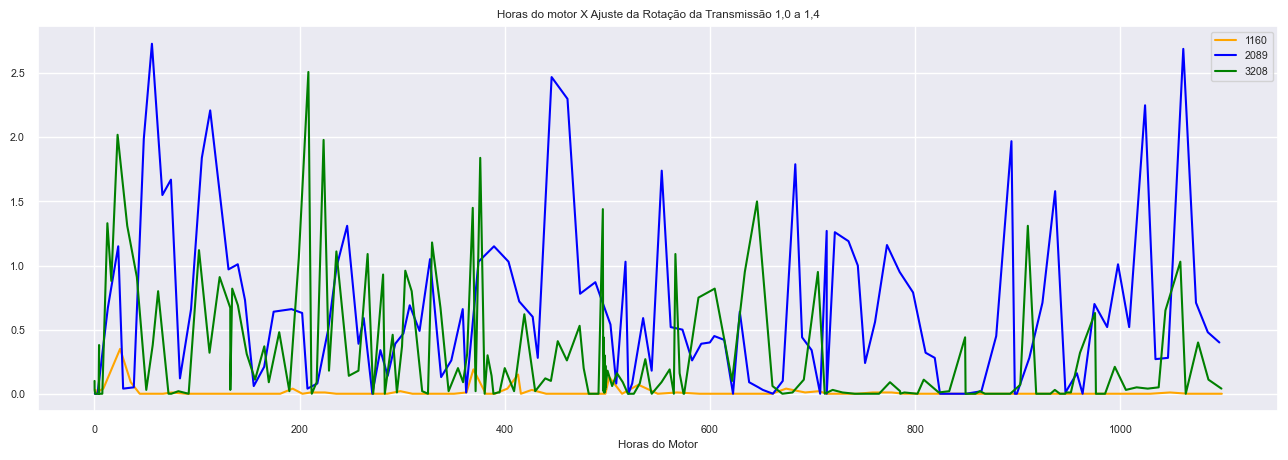

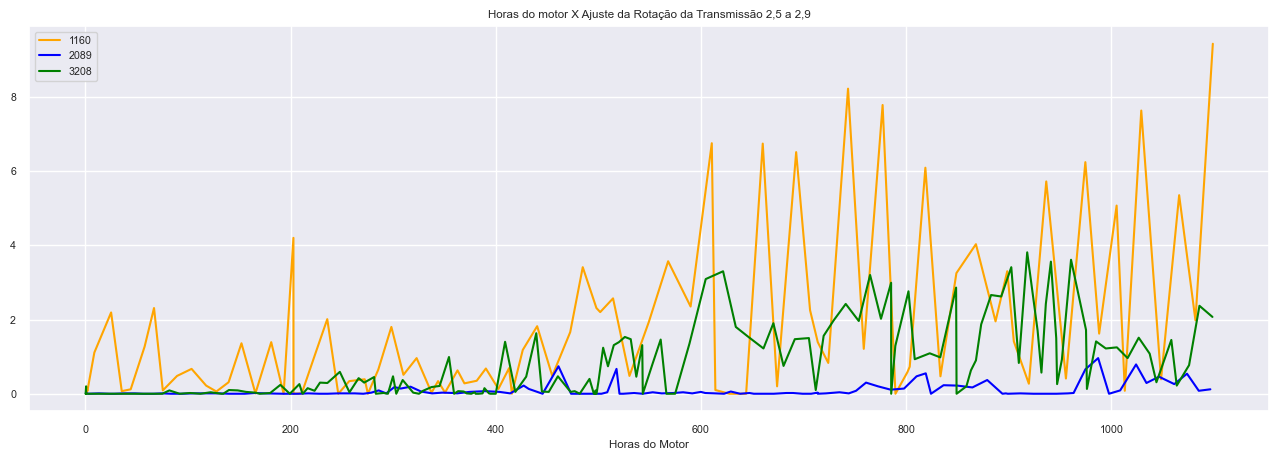

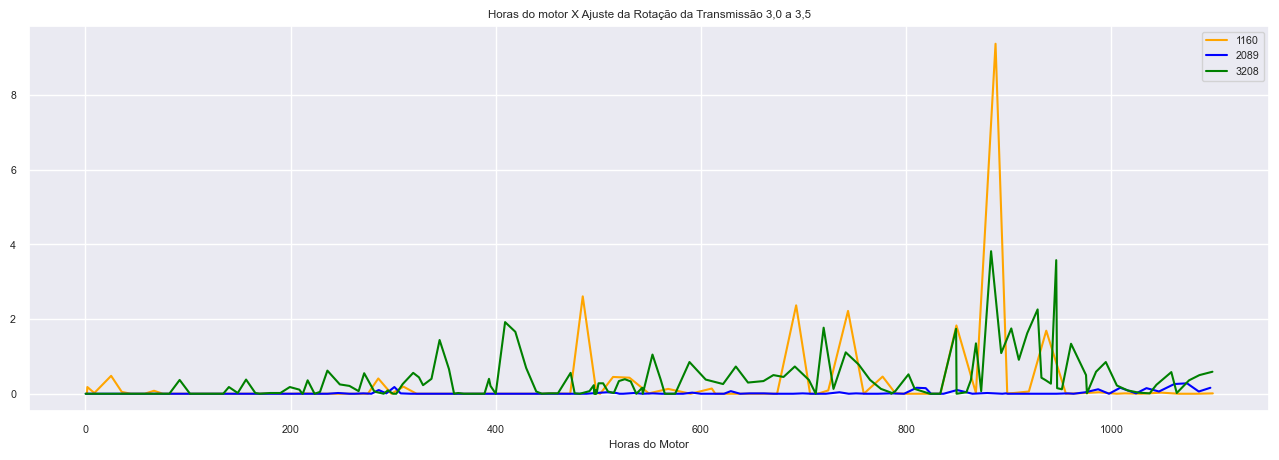

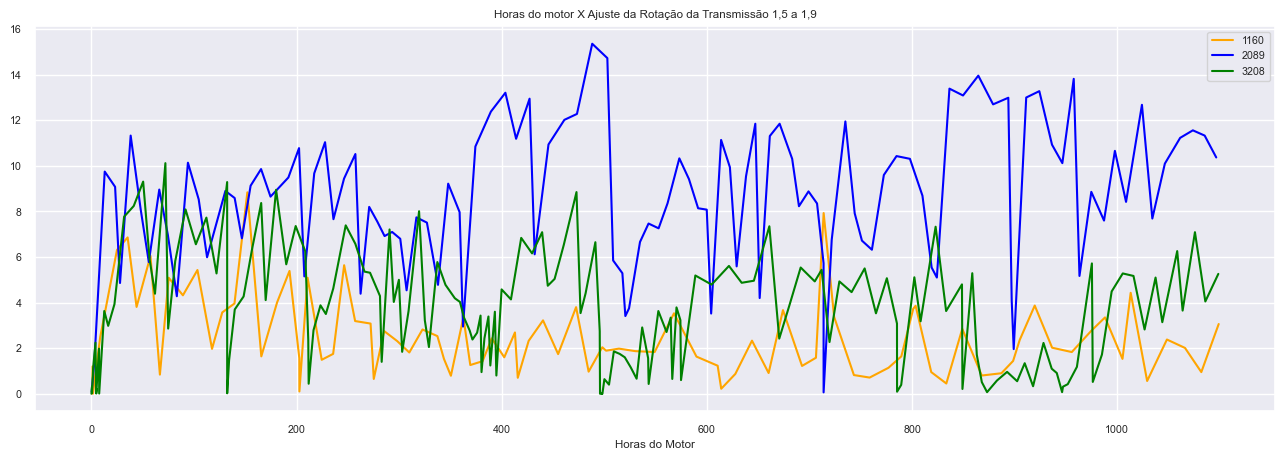

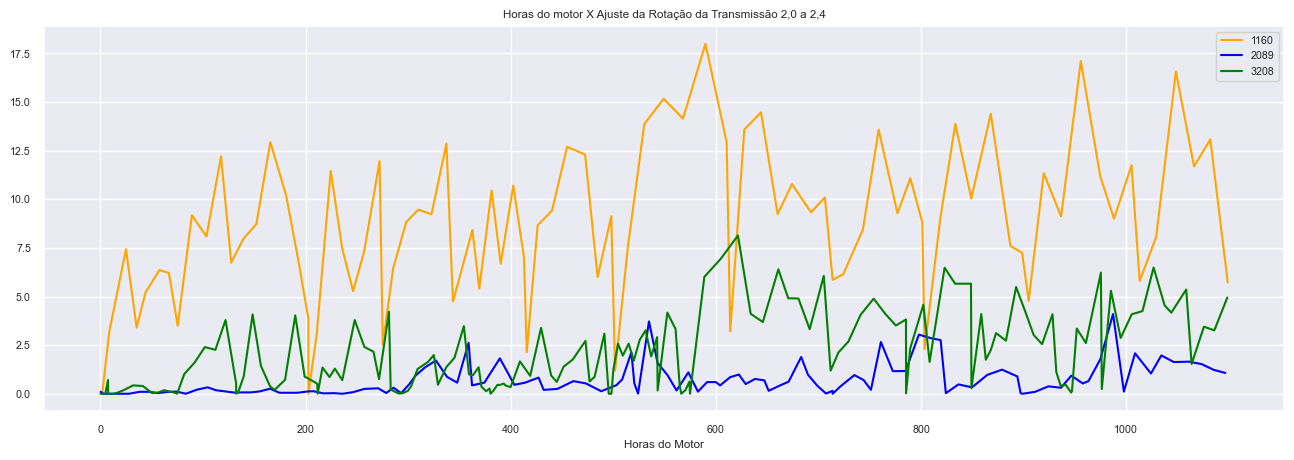

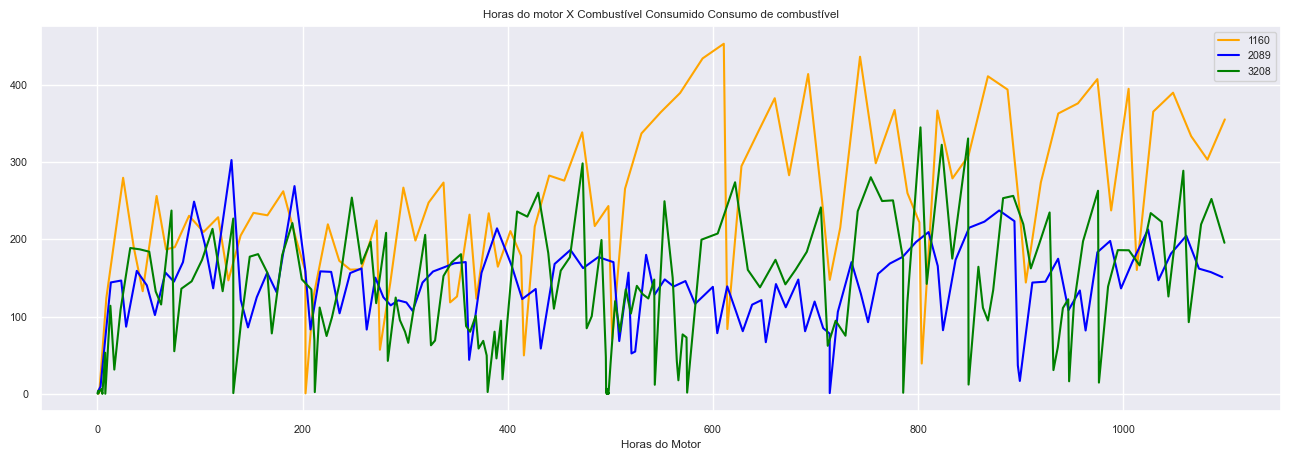

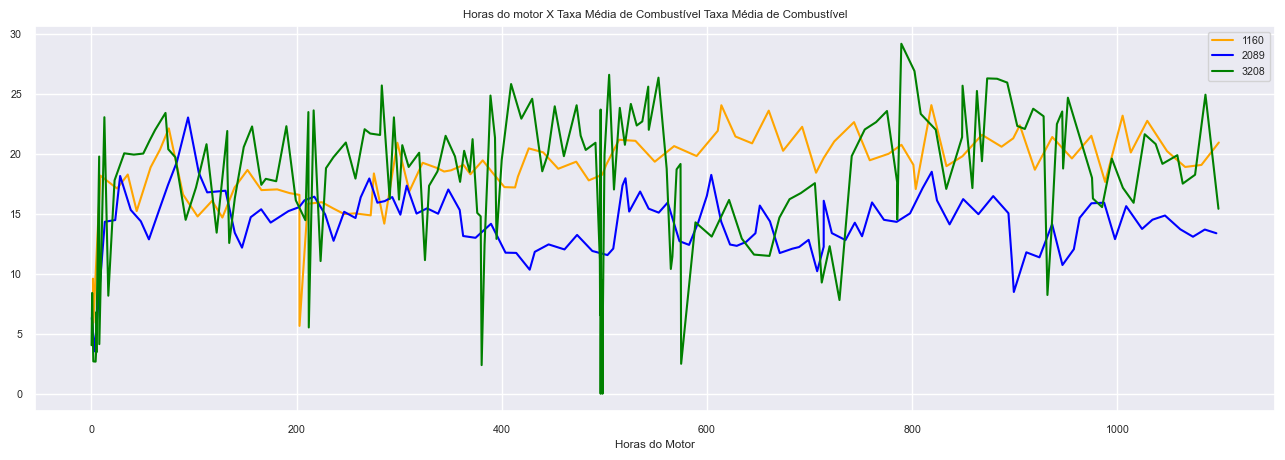

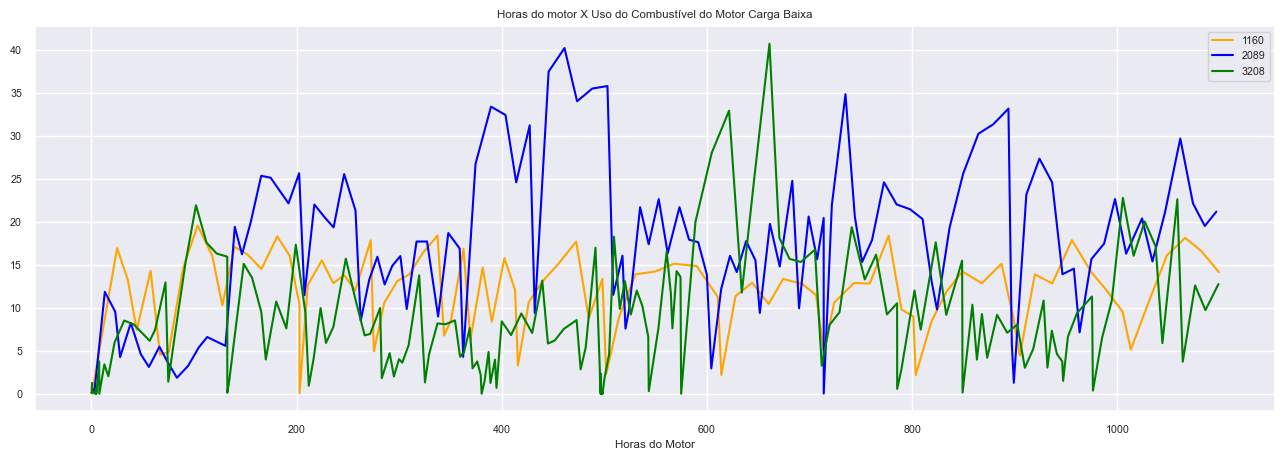

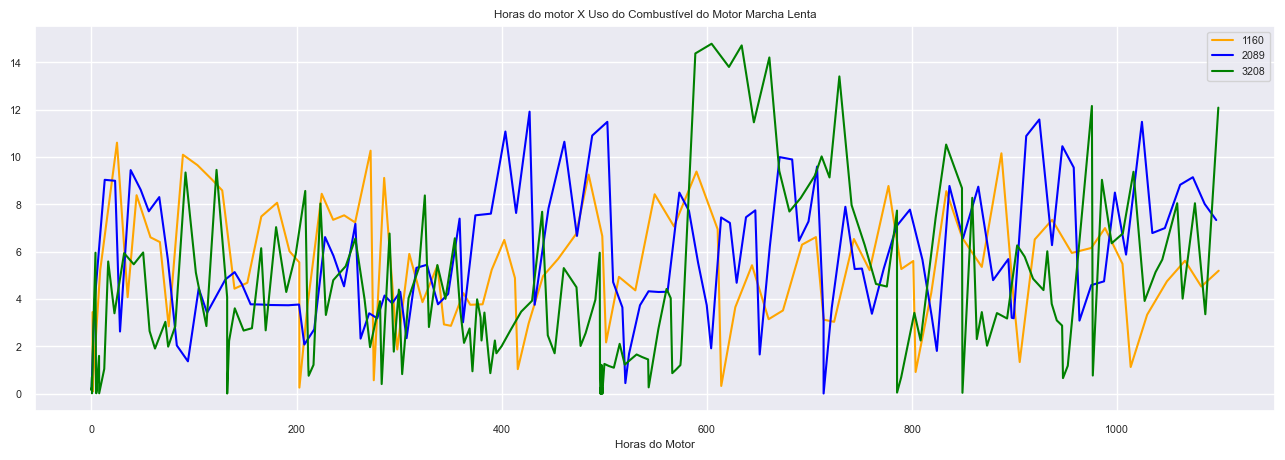

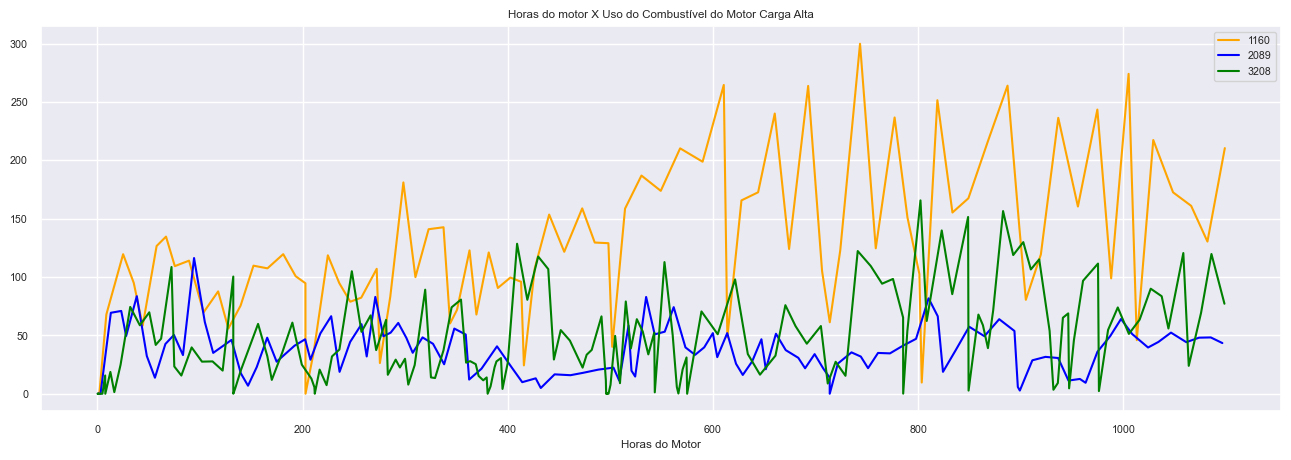

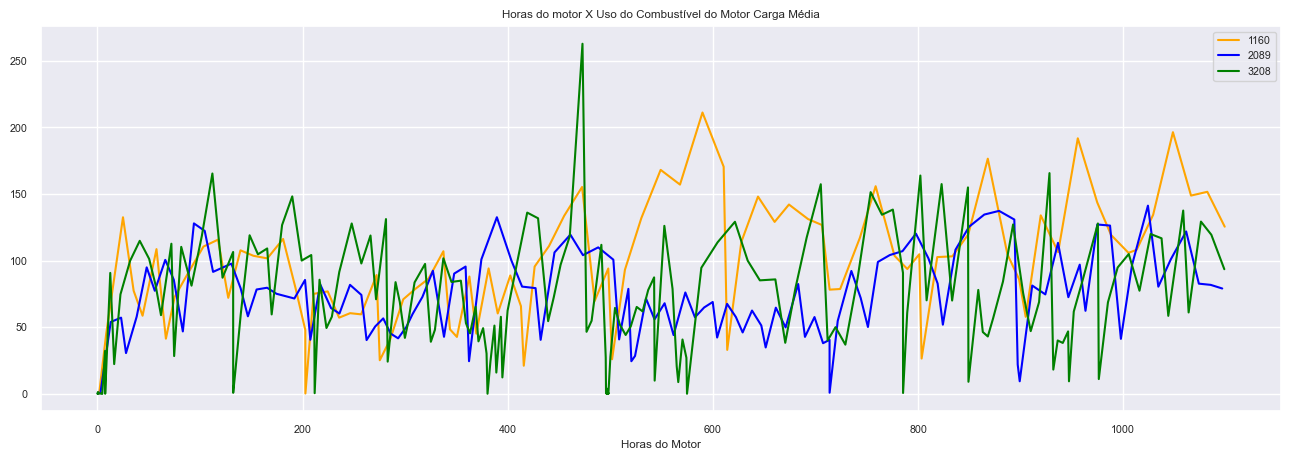

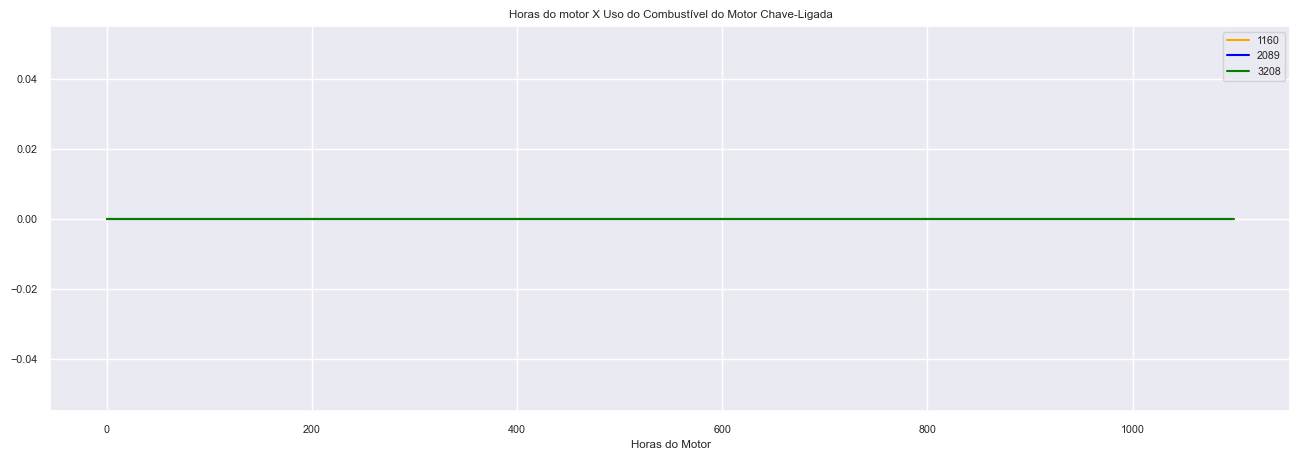

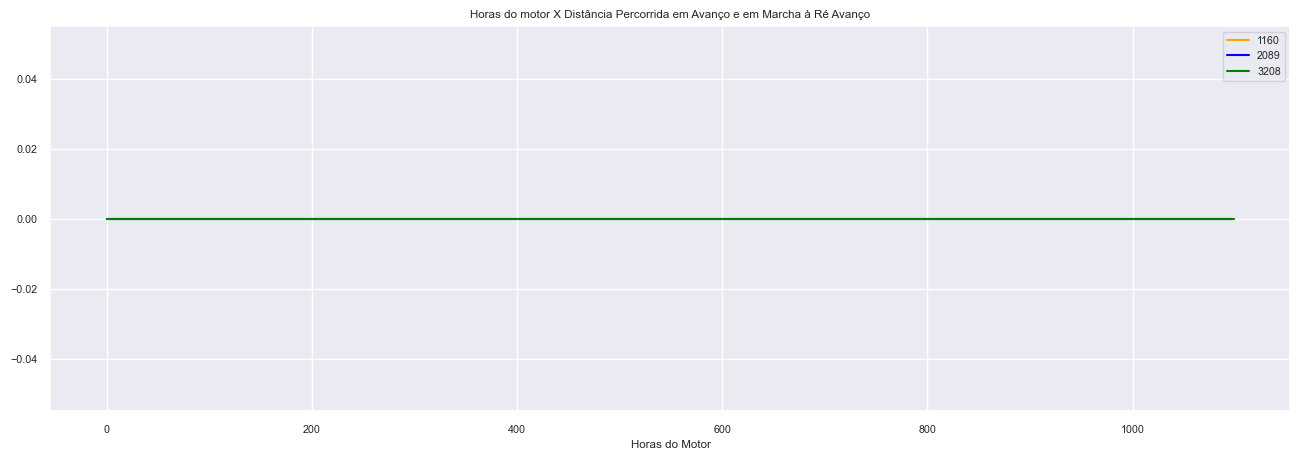

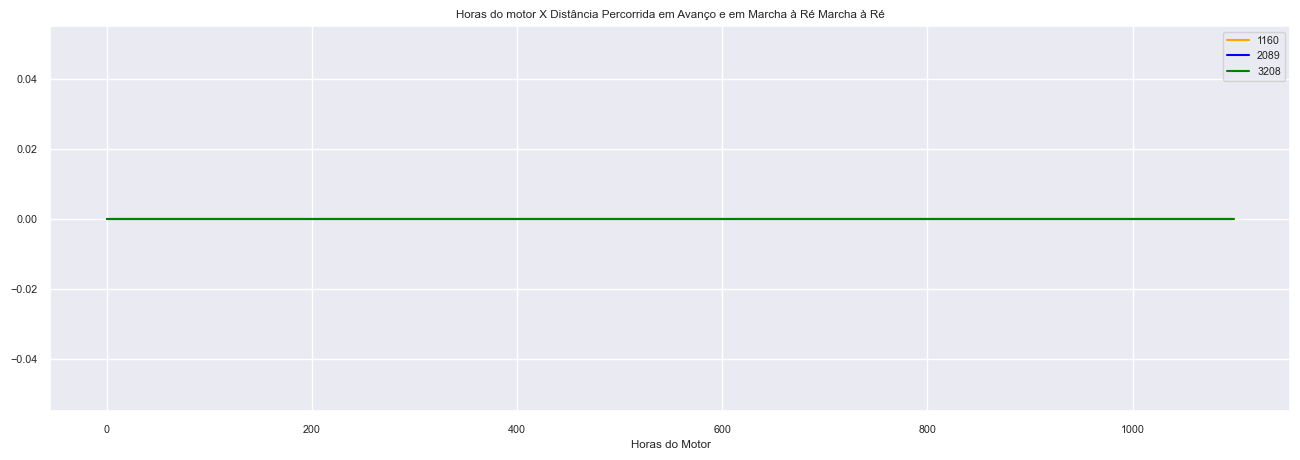

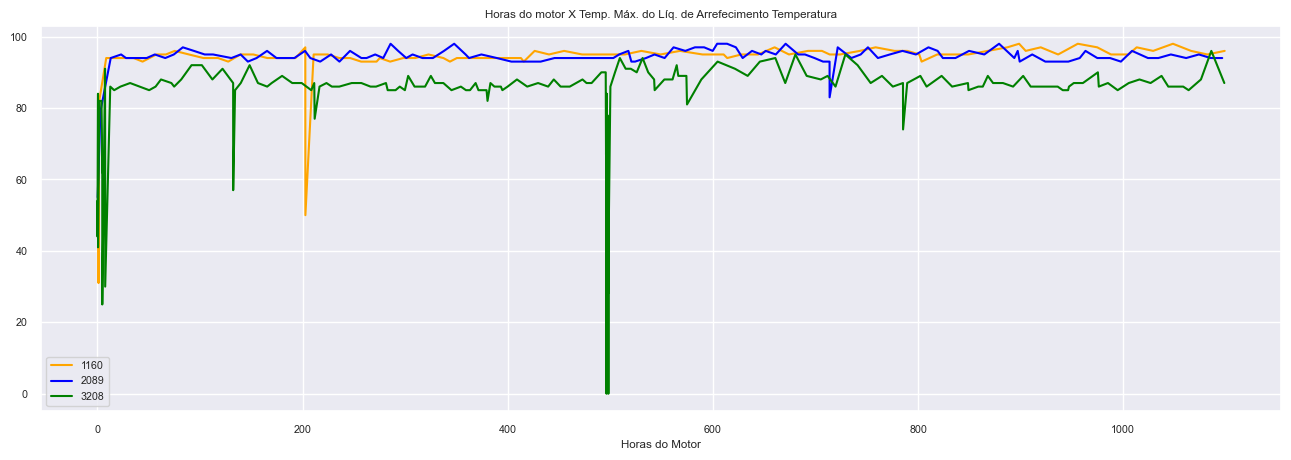

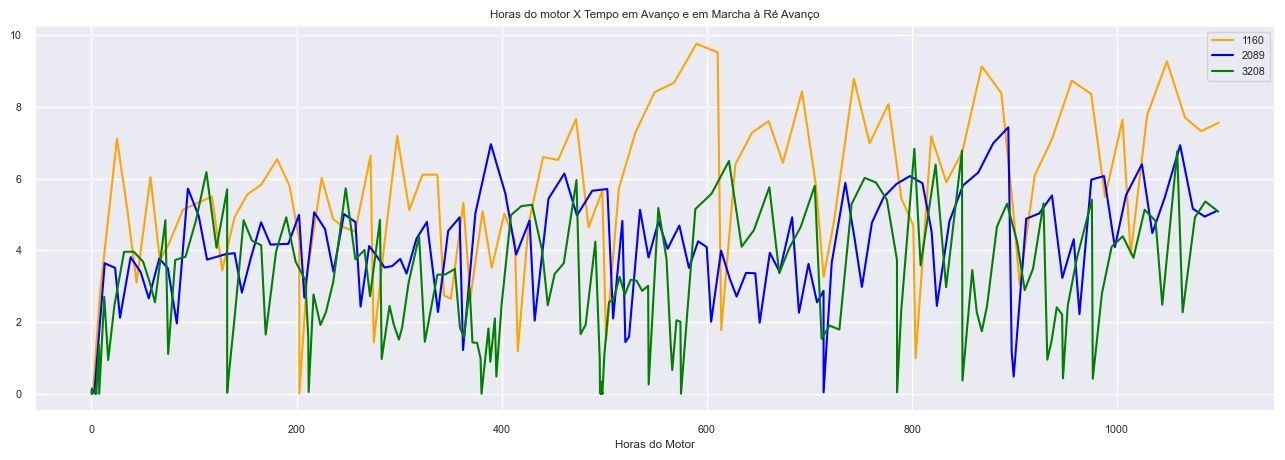

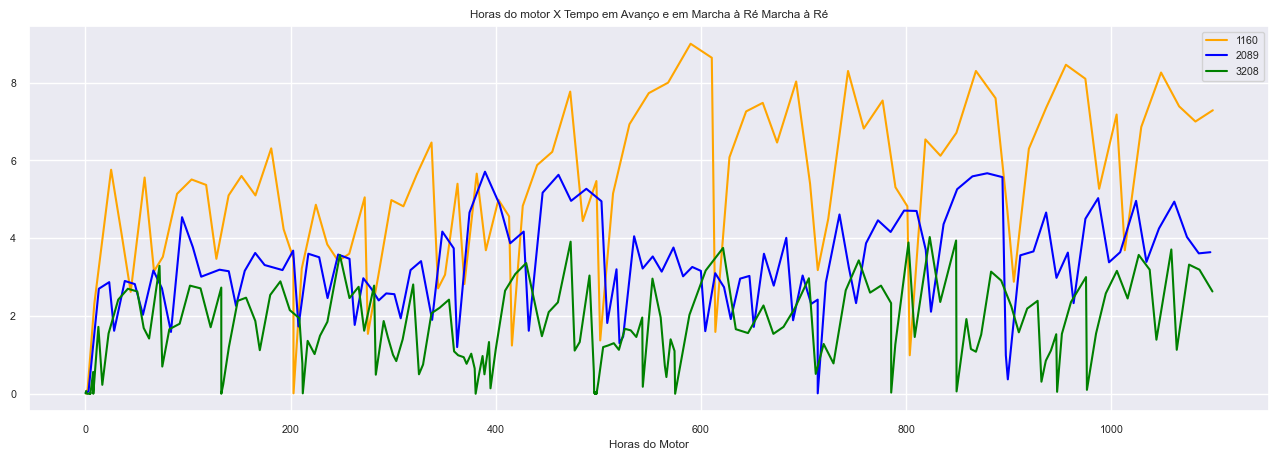

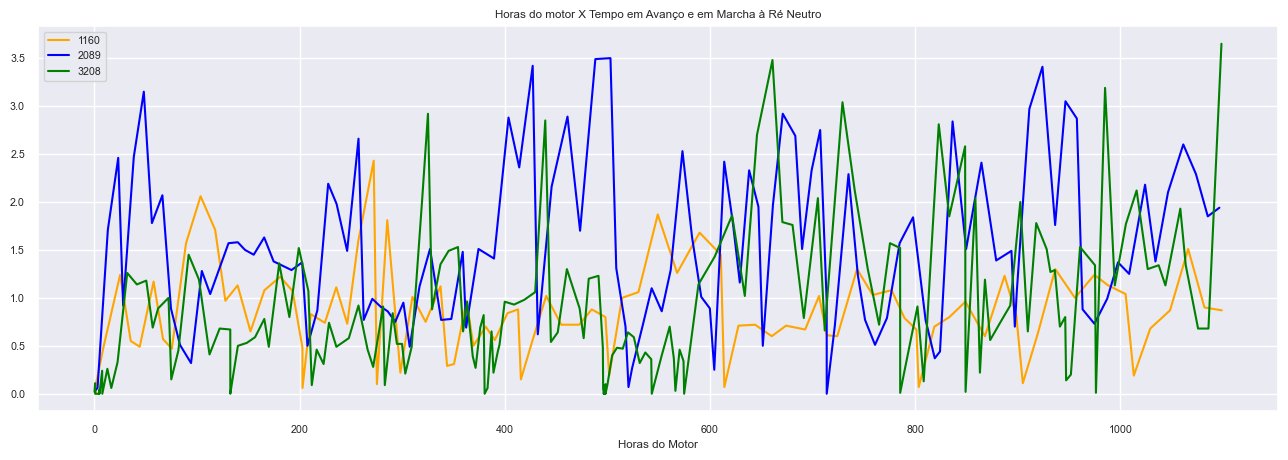

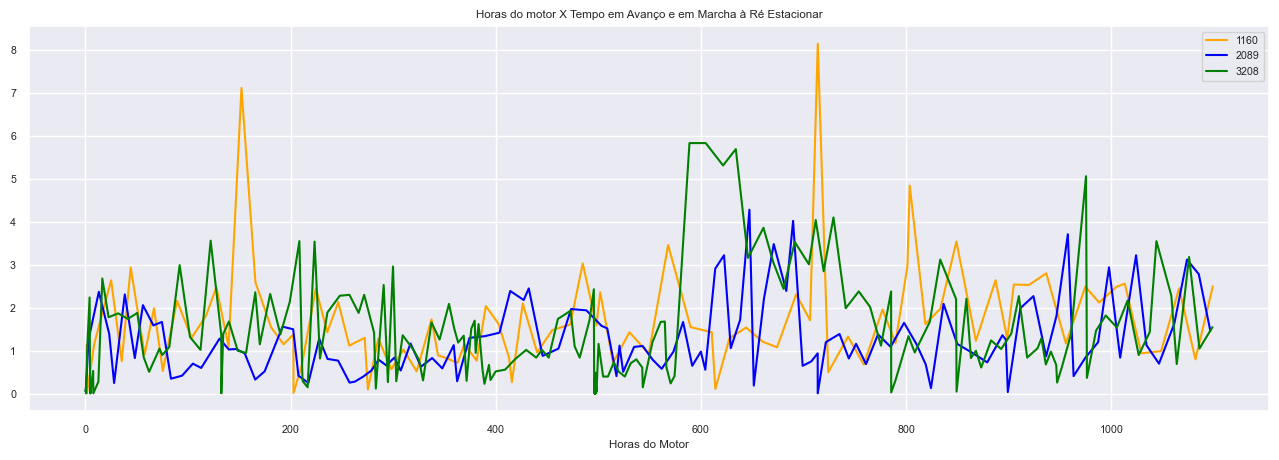

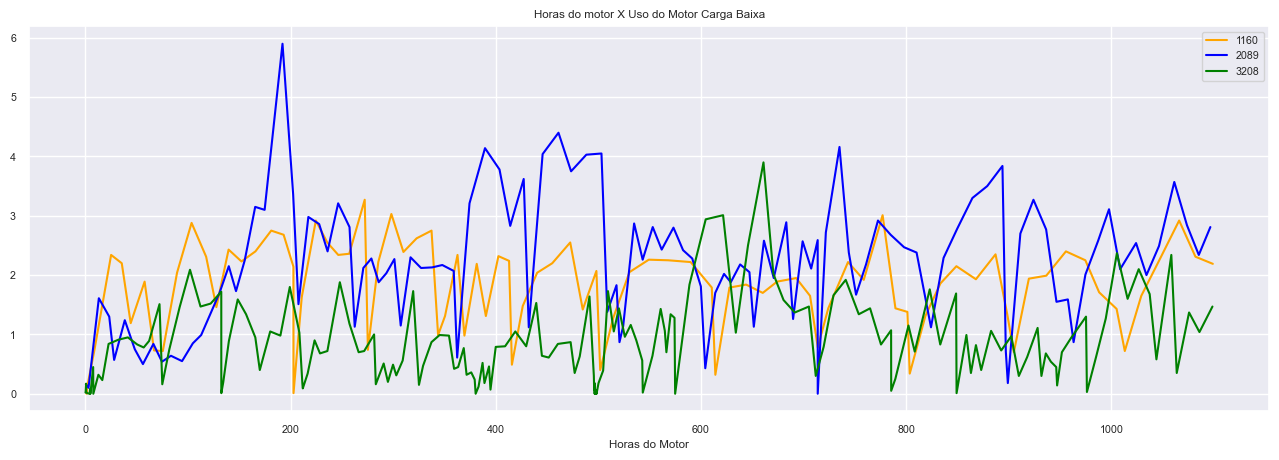

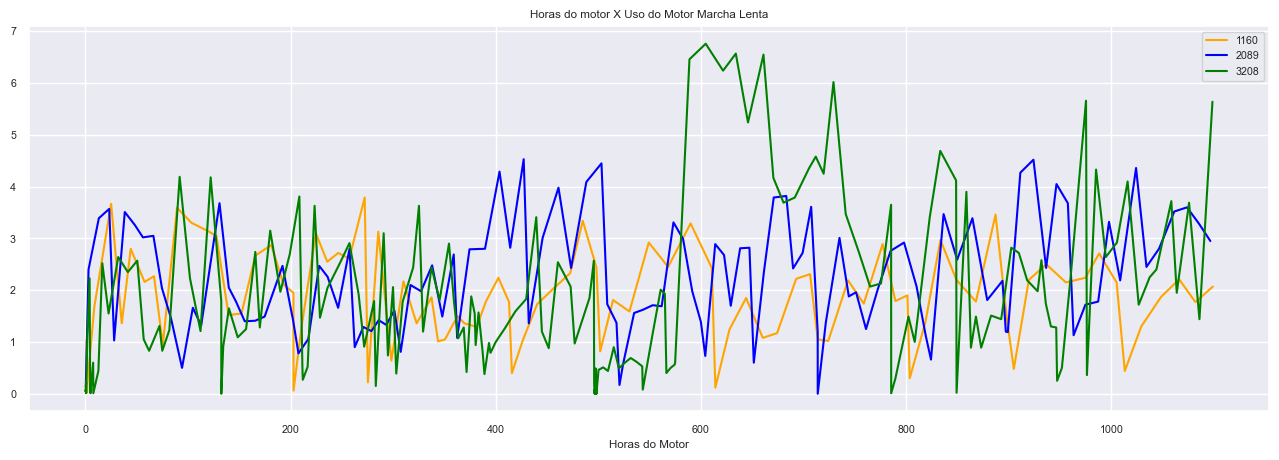

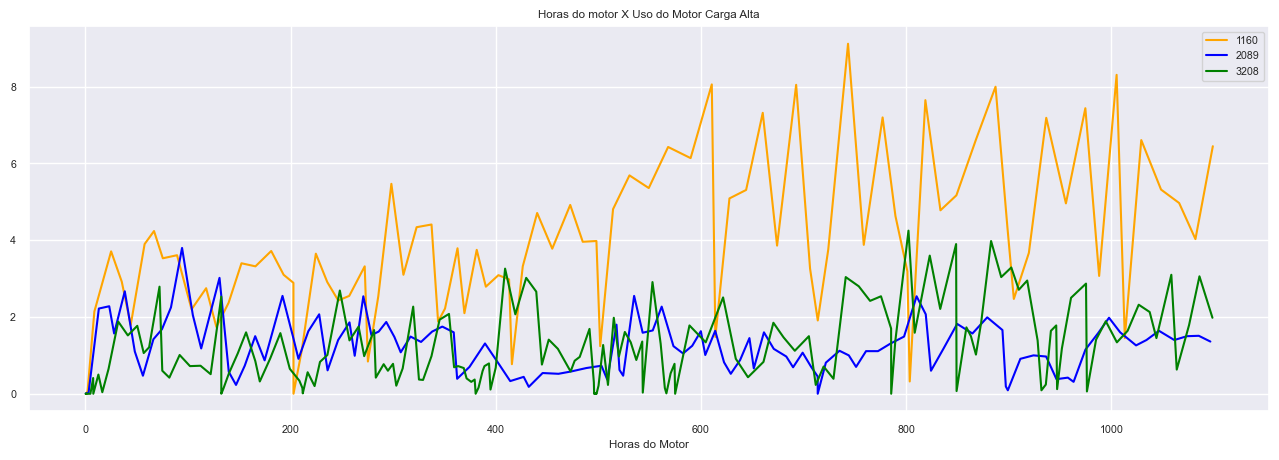

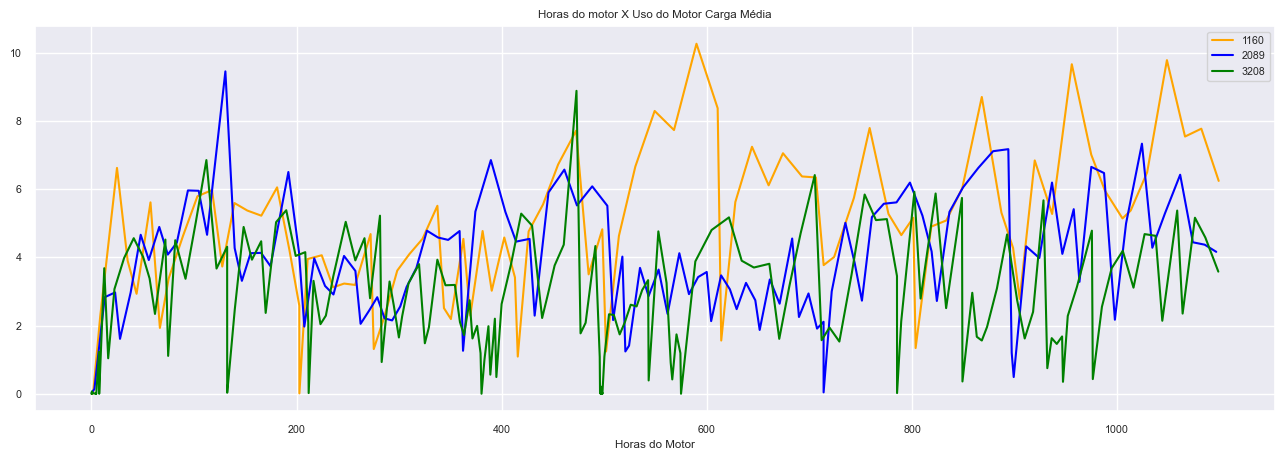

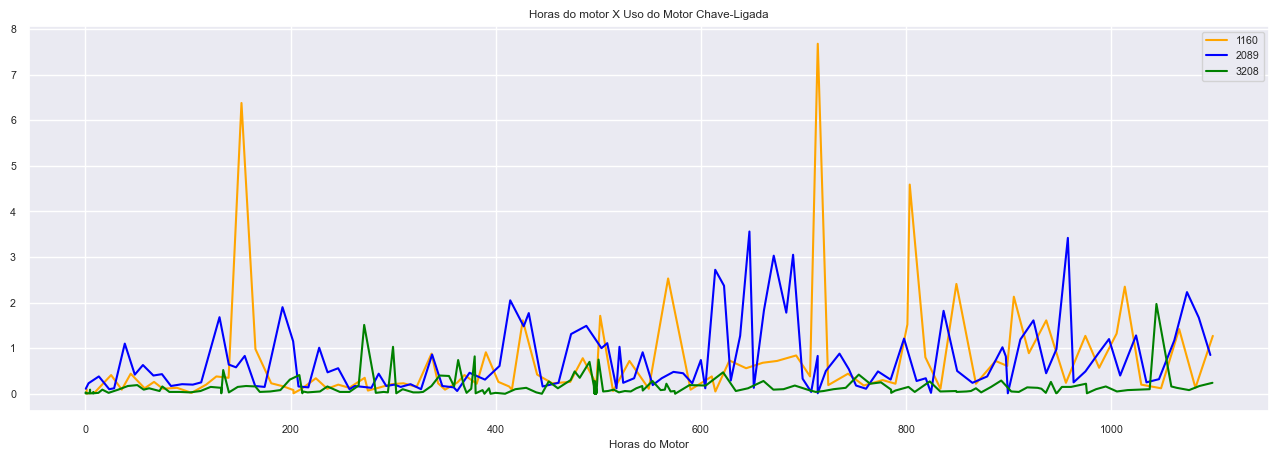

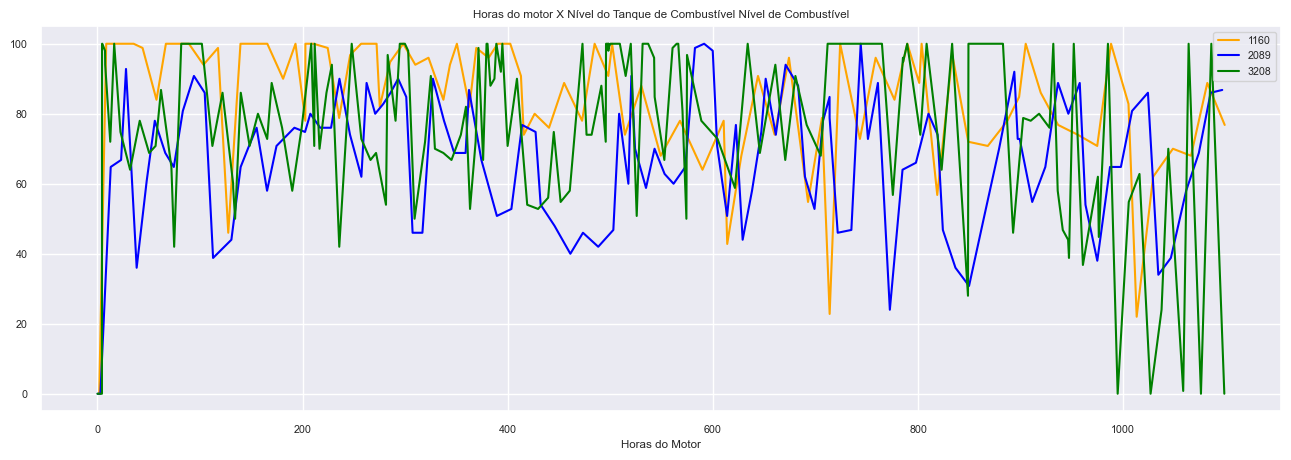

In [13]:
def triple_line_plot(*args, **kwargs):
  x = kwargs['x']
  y = kwargs['y']
  label1 = kwargs['label1']
  label2 = kwargs['label2']
  label3 = kwargs['label3']
  title = kwargs['title']
  dfs = kwargs['dfs']

  ax = dfs[0].plot(x=x, y=y, label=label1, color='orange')
  ax2 = dfs[1].plot(ax=ax, x=x, y=y, label=label2, figsize=(16,5), color="blue")
  dfs[2].plot(ax=ax2, x=x, y=y, label=label3, figsize=(16,5), title=title, color="green")
  plt.show()


dfs = [df_1160_0296_1100, df_2089_0451_1100, df_3208_0379_1100]

for category in categories:
  triple_line_plot(dfs=dfs, x="Horas do Motor", y=category,
                 label1="1160", label2="2089", label3="3208",
                 title=f"Horas do motor X {category}")


### Médias e Desvio Padrão

In [14]:
col1 = "Tempo em Avanço e em Marcha à Ré Marcha à Ré"

average_reverse_1160 = df_1160_0296_1100.loc[:, col1].mean()
average_reverse_2089 = df_2089_0451_1100.loc[:, col1].mean()
average_reverse_3208 = df_3208_0379_1100.loc[:, col1].mean()

# Desvio padrão
std_reverse_1160 = df_1160_0296_1100.loc[:, col1].std()
std_reverse_2089 = df_2089_0451_1100.loc[:, col1].std()
std_reverse_3208 = df_3208_0379_1100.loc[:, col1].std()

print("Média de tempo em ré 1160: %.2f h" % average_reverse_1160)
print("Média de tempo em ré 2089: %.2f h" % average_reverse_2089)
print("Média de tempo em ré 3208: %.2f h\n" % average_reverse_3208)

print("Desvio padrão 1160: %.2f h" % std_reverse_1160)
print("Desvio padrão 2089: %.2f h" % std_reverse_2089)
print("Desvio padrão 3208: %.2f h" % std_reverse_3208)

p = average_reverse_3208/average_reverse_1160*100
print("Proporção do tempo em ré do 3208 em relação ao uso do 1160: %.2f%%" % p)

Média de tempo em ré 1160: 4.97 h
Média de tempo em ré 2089: 3.25 h
Média de tempo em ré 3208: 1.46 h

Desvio padrão 1160: 2.30 h
Desvio padrão 2089: 1.25 h
Desvio padrão 3208: 1.14 h
Proporção do tempo em ré do 3208 em relação ao uso do 1160: 29.39%


## Relação ré/avanço

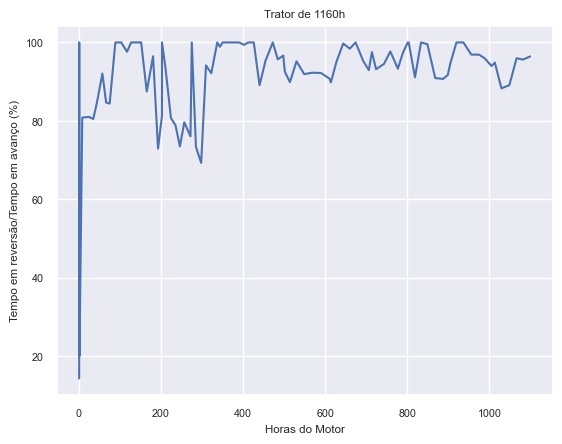

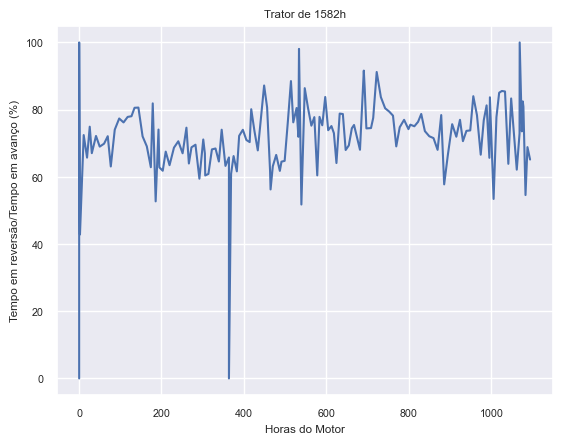

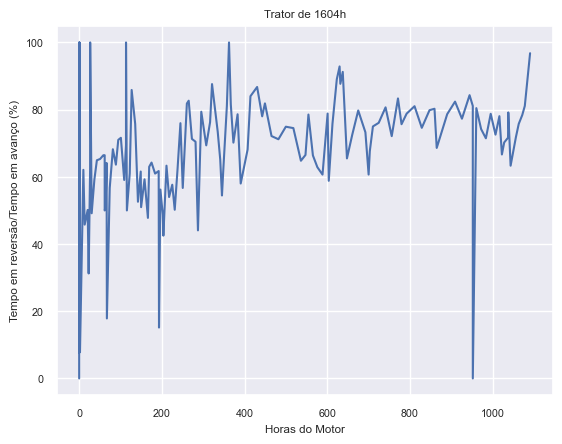

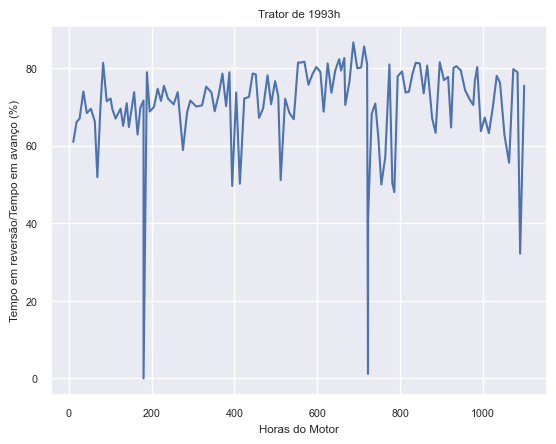

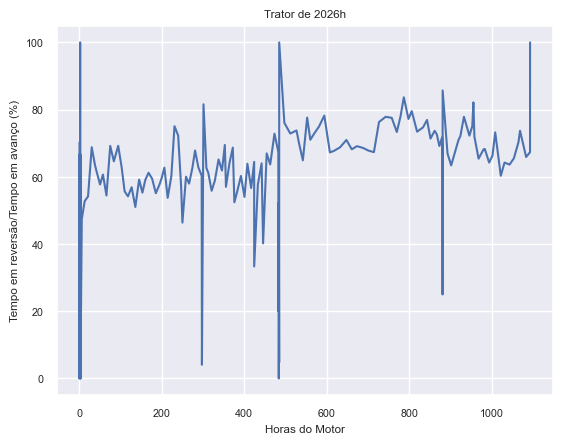

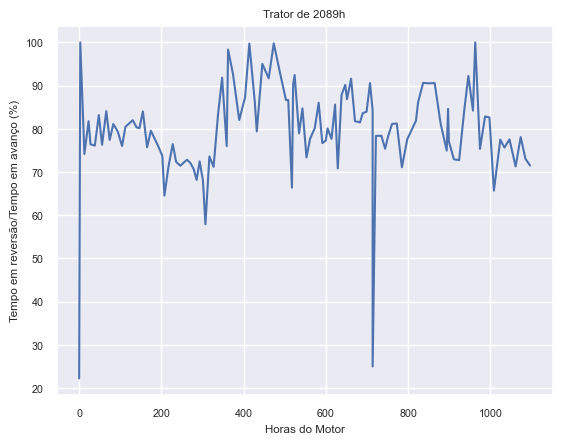

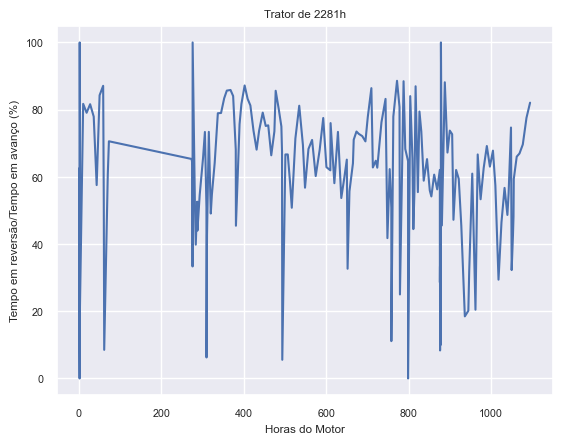

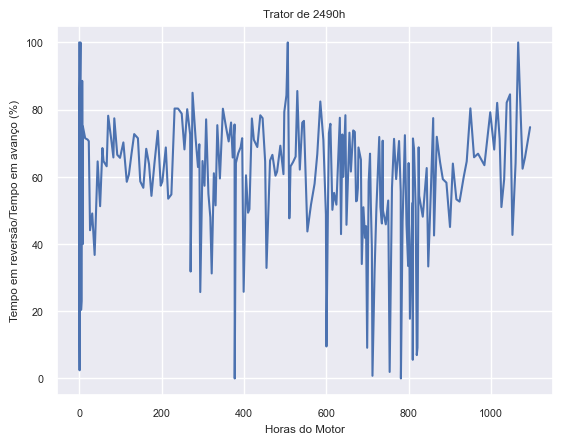

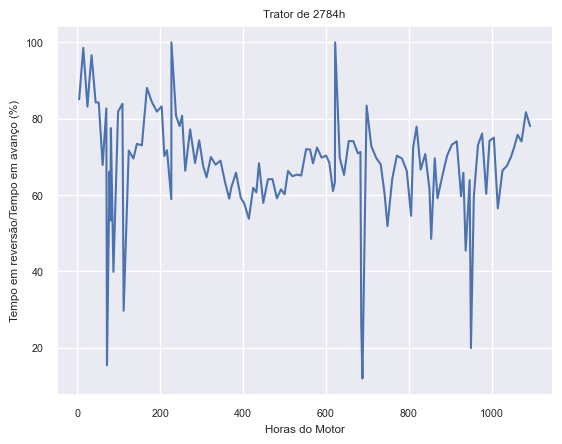

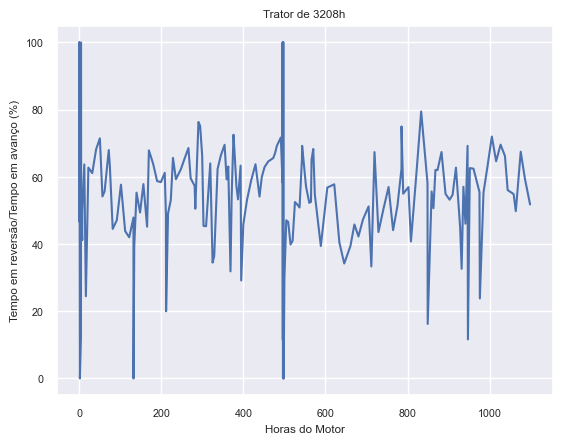

In [15]:
for key, df in df_filtered_list.items():
  
  df['Tempo em reversão/Tempo em avanço'] = (df['Tempo em Avanço e em Marcha à Ré Marcha à Ré']/df['Tempo em Avanço e em Marcha à Ré Avanço'])*100
  df.dropna(inplace=True)
  df.loc[df['Tempo em reversão/Tempo em avanço'] > 100, 'Tempo em reversão/Tempo em avanço'] = 100

  fig, ax = plt.subplots()
  ax.plot(df['Horas do Motor'], df['Tempo em reversão/Tempo em avanço'])
  ax.set_title(f"Trator de {key}h")
  plt.ylabel("Tempo em reversão/Tempo em avanço (%)")
  plt.xlabel("Horas do Motor")
  plt.show()

## Uso de Ajustes de Rotação da Transmissão

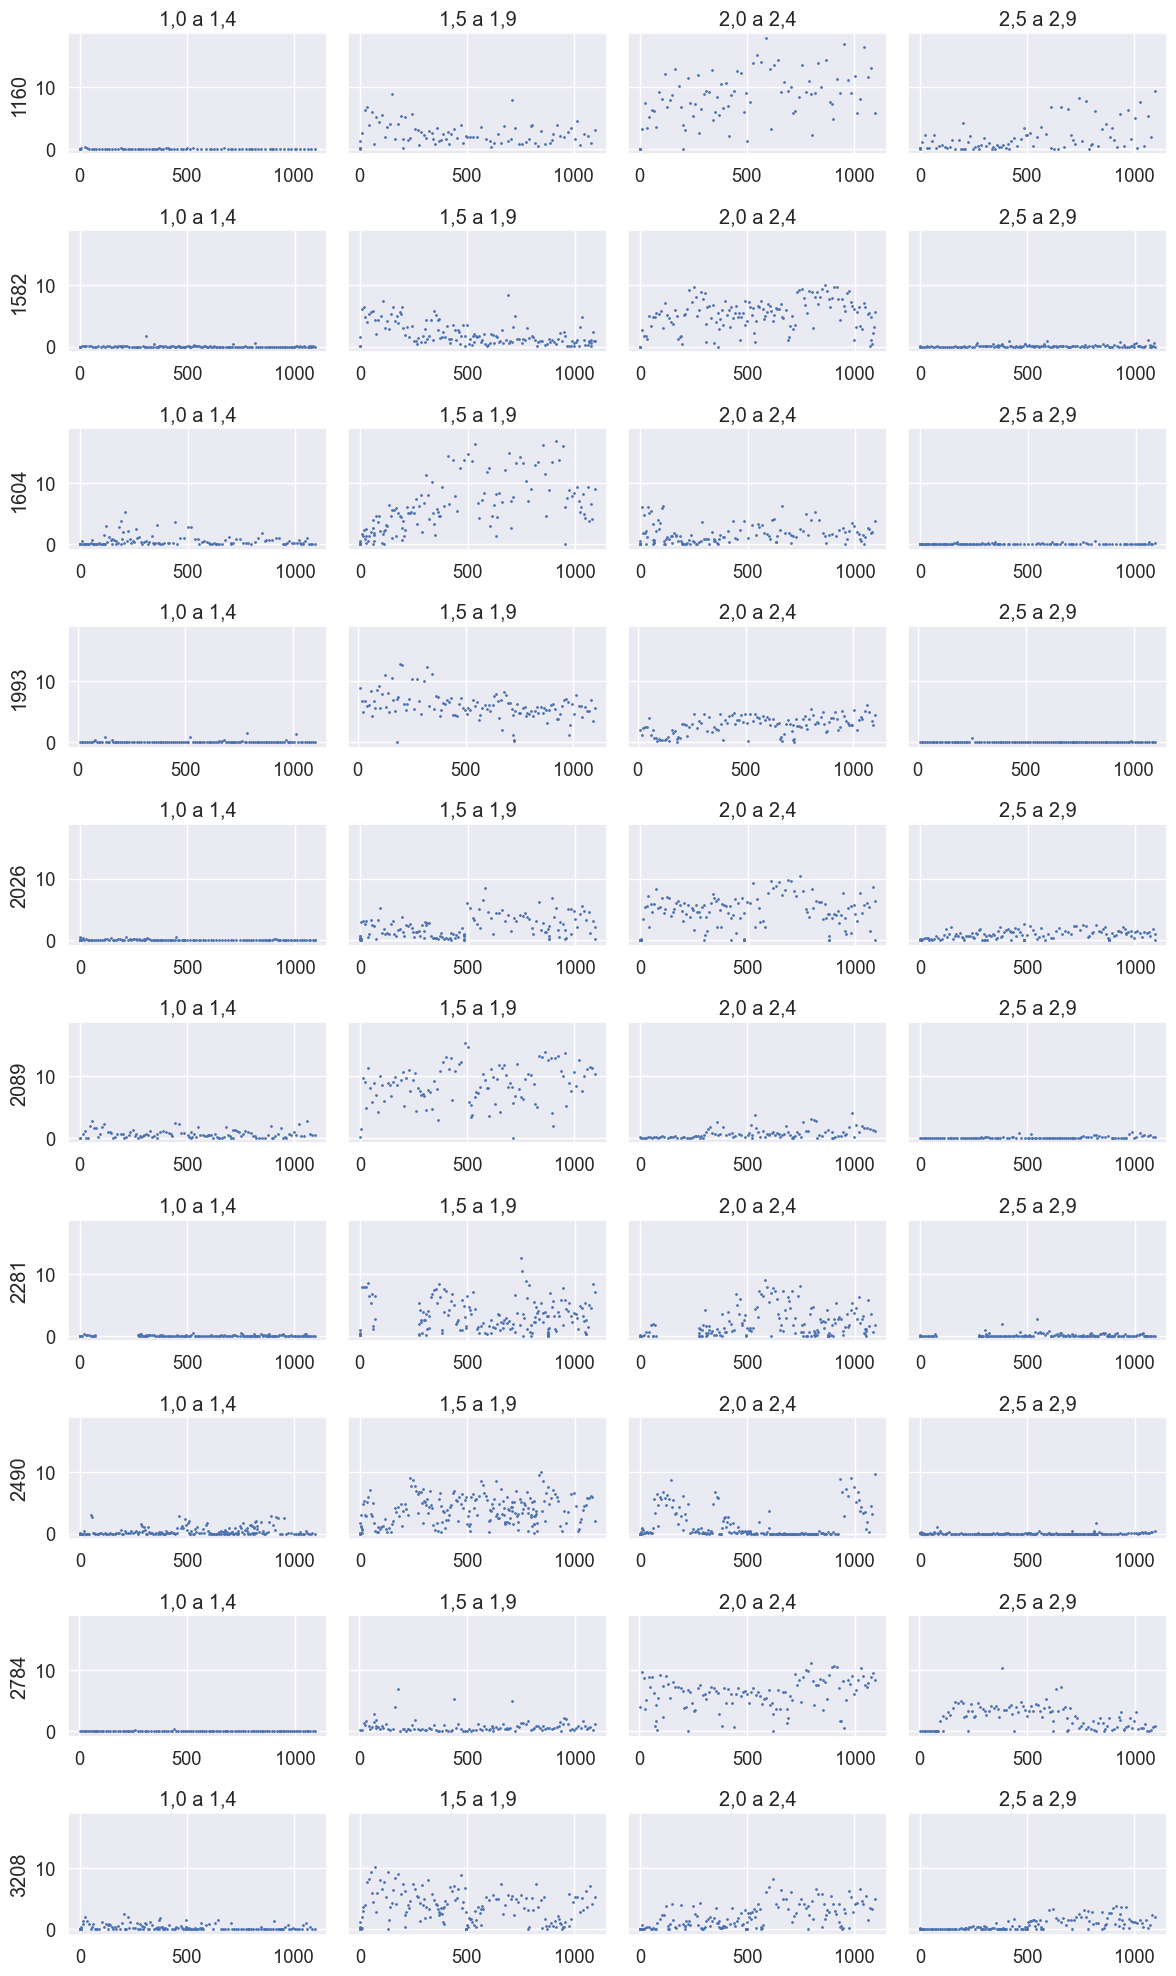

In [16]:
sns.set_theme(font_scale=1.2)
fig, axs = plt.subplots(10, 4, figsize=(12, 20), sharey=True)

j = 0
for key, df in df_filtered_list.items():
  for i in range(4):
    axs[j, i].scatter(df['Horas do Motor'], df[transmission_cols[i]], s=1)
    axs[j, i].set_title(transmission_cols[i][33:])

  axs[j, 0].set_ylabel(key)
  j += 1

fig.tight_layout()

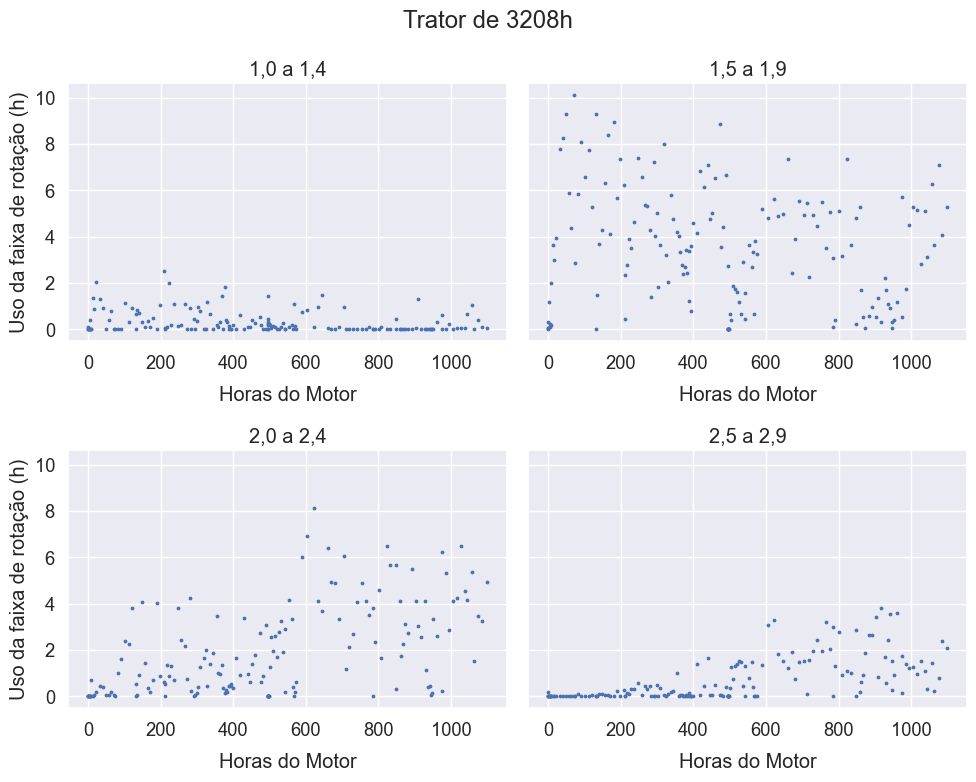

In [17]:
# Apêndice C

sns.set_theme(font_scale=1.2)
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharey=True)

cols = [
        "Ajuste da Rotação da Transmissão 1,0 a 1,4",
        "Ajuste da Rotação da Transmissão 1,5 a 1,9",
        "Ajuste da Rotação da Transmissão 2,0 a 2,4",
        "Ajuste da Rotação da Transmissão 2,5 a 2,9",
        ]

hora = '3208'
df = df_filtered_list[hora]
c = 0
for j in range(2):
  for i in range(2):
    axs[j, i].scatter(df['Horas do Motor'], df[cols[c]], s=3)
    axs[j, i].set_title(cols[c][33:])
    axs[j, i].set_xlabel(f"Horas do Motor", labelpad=10)
    c += 1
  axs[j, 0].set_ylabel(f"Uso da faixa de rotação (h)")

fig.suptitle(f"Trator de {hora}h")
fig.tight_layout()

## Correlação: Tempo em Deslocamento e Carga Média do Motor

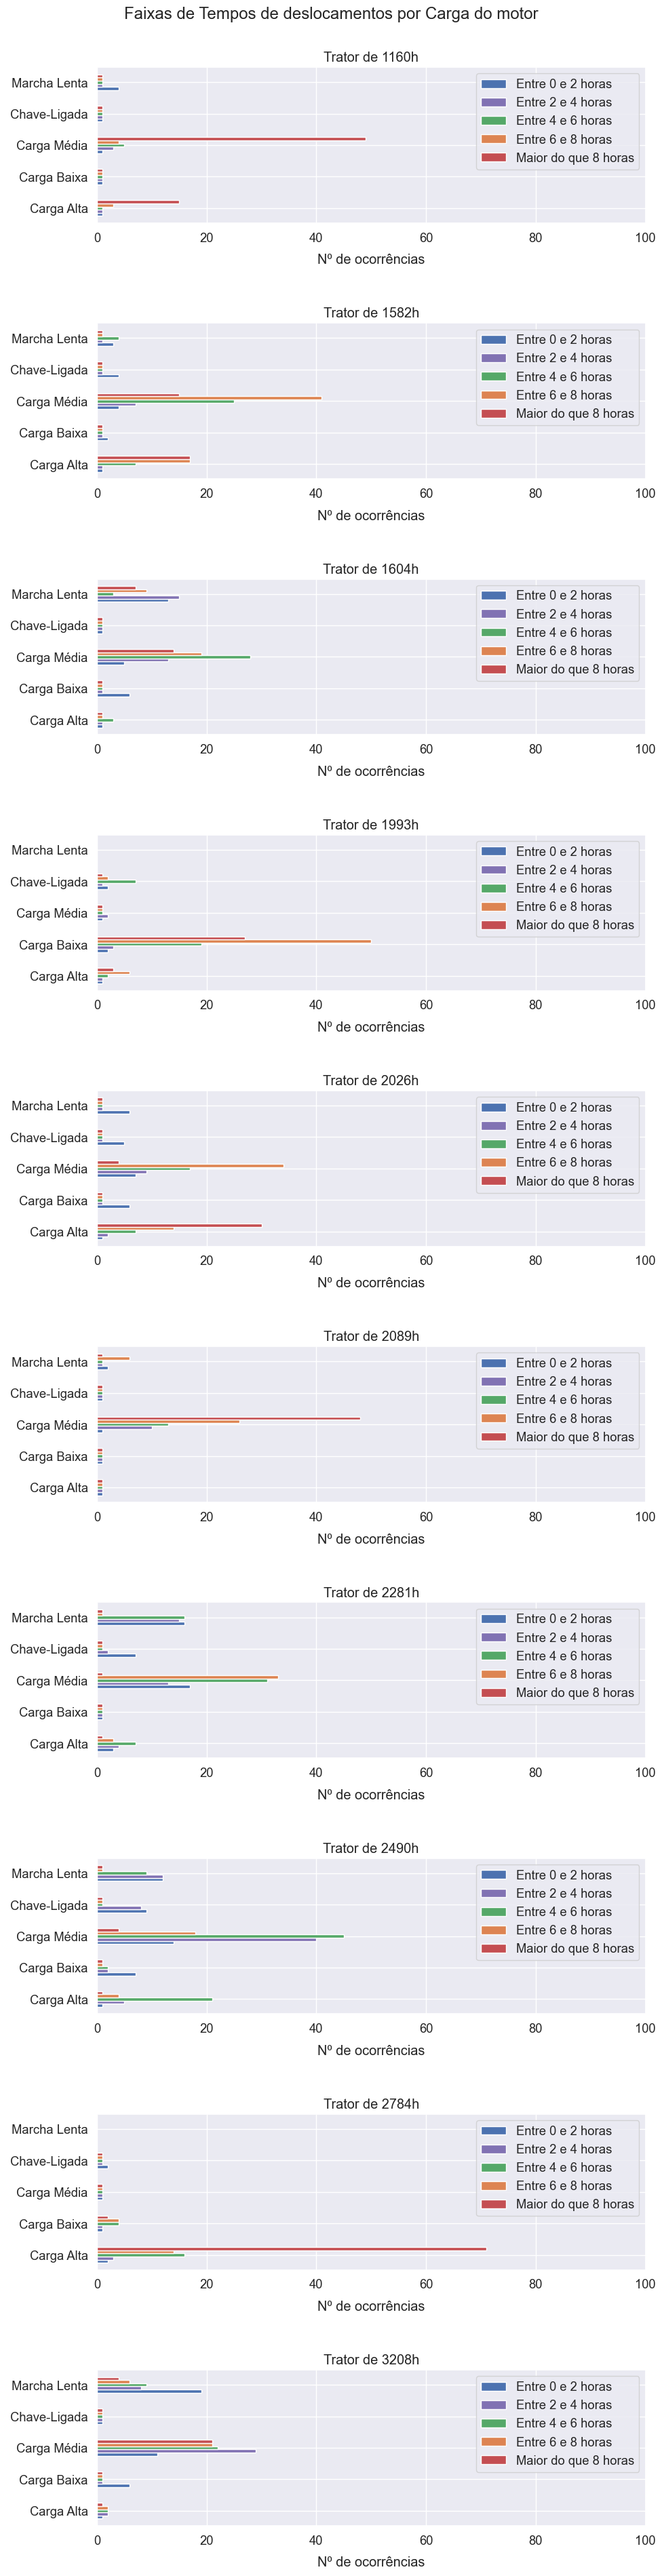

In [ ]:
def corr_bar_plot():
    lbl_colors = {
        "Entre 0 e 2 horas": "#4C72B0",
        "Entre 2 e 4 horas": "#8172B3",
        "Entre 4 e 6 horas": "#55A868",
        "Entre 6 e 8 horas": "#DD8452",
        "Maior do que 8 horas": "#C44E52",
    }

    def set_interval(value):
        if 0.0 <= value <= 2.0:
            return "Entre 0 e 2 horas"
        elif 2.0 < value <= 4.0:
            return "Entre 2 e 4 horas"
        elif 4.0 < value <= 6.0:
            return "Entre 4 e 6 horas"
        elif 6.0 < value <= 8.0:
            return "Entre 6 e 8 horas"
        else:
            return "Maior do que 8 horas"

    num_plots = len(df_filtered_list)

    fig, axs = plt.subplots(num_plots, 1, figsize=(10, num_plots * 4), sharey=True)
    plt.rc('ytick', labelsize=14)

    if num_plots == 1:
        axs = [axs]

    plot_index = 0
    for key, df in df_filtered_list.items():
        if key == 'df_1582_0509':
            continue

        df['Carga do Motor Predominante'] = df[
            [
                'Uso do Motor Carga Baixa',
                'Uso do Motor Carga Média',
                'Uso do Motor Carga Alta',
                'Uso do Motor Marcha Lenta',
                'Uso do Motor Chave-Ligada',
            ]
        ].idxmax(axis=1)

        df['Faixa do Tempo Total em Deslocamento'] = (
            df['Tempo em Avanço e em Marcha à Ré Avanço'] + df['Tempo em Avanço e em Marcha à Ré Marcha à Ré']
        ).apply(set_interval)

        displacement_rng_cols = np.sort(df['Faixa do Tempo Total em Deslocamento'].unique())
        engine_load_cols = np.sort(df['Carga do Motor Predominante'].unique())

        data = {}

        for rng in displacement_rng_cols:
            values = df['Carga do Motor Predominante'][df['Faixa do Tempo Total em Deslocamento'] == rng].value_counts()
            data[rng] = values

        df_summarized = pd.DataFrame(data, index=engine_load_cols)
        df_summarized.fillna(1, inplace=True)  # Preenche os NaN's com 1 para evitar espaços vazios no gráfico

        x = np.arange(len(engine_load_cols))
        bar_width = 0.1
        multiplier = 0

        for rng in displacement_rng_cols:
            offset = bar_width * multiplier
            rects = axs[plot_index].barh(x + offset, df_summarized[rng], bar_width, label=rng, color=lbl_colors[rng])
            # axs[plot_index].bar_label(rects, padding=3)
            multiplier += 1

        axs[plot_index].set_title(f"Trator de {key}h")
        axs[plot_index].set_xlim(xmax=100)
        axs[plot_index].set_xlabel("Nº de ocorrências", labelpad=10)

        if plot_index == 0:
            axs[plot_index].set_yticks(x + bar_width * 2, map(lambda load: load.split("Motor")[1], engine_load_cols))

        axs[plot_index].legend()

        plot_index += 1

    fig.suptitle("Faixas de Tempos de deslocamentos por Carga do motor")
    plt.tight_layout(rect=[0, 0.03, 1, 0.98], h_pad=3)
    plt.show()

corr_bar_plot()